## Standard Code

In [199]:
from queue import PriorityQueue
import operator
import sys
import numpy as np
import random
#without Dictionary update
        

class AStarResolver:
    def __init__(self,Klst,n,m,dlst):
        #self.path=[]
        self.priorityQueue=PriorityQueue()
        self.lst=Klst
        self.n=n
        self.m=m
        self.Klst=Klst
        self.cells_processed=0
        self.exploredset={()}
        
    
    # Function to initialize the Dictionary
    # Key: type(string), x, y coordinates of all the cells
    # Values: type(dictionary), containing the values of g(n), h(n), f(n), p(n)
    def init_dict(self,x = 0,y = 0):
        self.d = {(x,y): [ 0, None, None]}
        return self.d

    def Solve(self,x = 0,y = 0):
        found=0
        self.priorityQueue.put((0,x,y))
        self.init_dict(x,y)
        while not self.priorityQueue.empty():
            
            
            #extracting start 2d list from tuple
            
            
            temp=self.priorityQueue.get()
            #print("PQ top=",temp)
            nTemp=temp[1]
            mTemp=temp[2]
            self.cells_processed=self.cells_processed+1
            #print(self.priorityQueue.empty())
            if nTemp==self.n-1 and mTemp==self.m-1:
                
                found=1
                #print("found")
                break
                
                
            if((nTemp, mTemp) not in self.d):
                return 
            g=self.d[nTemp,mTemp][0]
            g=g+1

            
            if nTemp-1>=0:
                up=(nTemp-1,mTemp)
                if self.lst[int(nTemp)-1][int(mTemp)]!=-1:
                    f1=self.calculateDist(up,g)
                    if (nTemp-1,mTemp) not in self.d:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                        #self.exploredset.update([(nTemp-1,mTemp)])
                    elif self.d[nTemp-1,mTemp][0]>g:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                
                        
                
                    
                    
            
            if nTemp+1<self.n:
                down=(nTemp+1,mTemp)
                if self.lst[int(nTemp)+1][int(mTemp)]!=-1:
                    f2=self.calculateDist(down,g)
                    if (nTemp+1,mTemp) not in self.d:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
        
                    elif self.d[nTemp+1,mTemp][0]>g:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
            
                        
                
            
            if mTemp+1<self.m:
                east=(nTemp,mTemp+1)
                if self.lst[nTemp][mTemp+1]!=-1:
                    f3=self.calculateDist(east,g)
                    if (nTemp,mTemp+1) not in self.d:
                        self.d[nTemp,mTemp+1]= [g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))

                    elif self.d[nTemp,mTemp+1][0]>g:
                        self.d[nTemp,mTemp+1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))
    
                
            if mTemp-1>=0:
                west=(nTemp,mTemp-1)
                if self.lst[nTemp][mTemp-1]!=-1:
                    f4=self.calculateDist(west,g)
                    if (nTemp,mTemp-1) not in self.d:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
                        
                    elif self.d[nTemp,mTemp-1][0]>g:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
            
            
            
                
            
        if found==0:
            ##print ("NOSUCCESS")
            filst=[]
            return filst
                
        else:
            
            return self.PathIterator()
            
            
            
            
            
            
        
        
        
    def PathIterator(self):
        filst=[]
        filst.append((self.n-1,self.m-1))
        #print(self.d[self.n-1,self.m-1])
        Pn=self.d[self.n-1,self.m-1][1]
        Pm=self.d[self.n-1,self.m-1][2]
        while Pn is not None or Pm is not None:
            filst.append((Pn,Pm))
            #print("Path Total[{},{}]".format(Pn, Pm),end=" ")
            An=self.d[Pn,Pm][1]
            Am=self.d[Pn,Pm][2]
            Pn,Pm=An,Am
        filst.reverse()
        #print(filst)
        return filst
    
    def EmptyQueue(self):
        while not self.priorityQueue.empty():
            try:
                self.priorityQueue.get(False)
            except Empty:
                continue
            self.priorityQueue.task_done()        
        
            
            
        
        
       
    def calculateDist(self,cord,g):
        
        h=abs(self.n-cord[0])+abs(self.m-cord[1])  #Manhattan distance
        
        #h=math.sqrt(pow(self.n-cord[0],2)+pow(self.m-cord[1],2)) #euclidean distance
        
        #h=max(abs(self.n-cord[0]),abs(self.m-cord[1])) # chebychef
        
        return (g+h,cord[0],cord[1])
    
    
    def get_cells_processed(self):
        return self.cells_processed

In [200]:
    def generateRandom(n = 0, p = -1):
        if(n <3):
            # If the user has not provided the size of the matrix
            # We will generate a nxn matrix of size between 3 and 1000
            n = random.randrange(start = 3, stop = 1000)
        # this is the probability of a cell being blocked
        if(p == -1):
            p = np.random.random()
        mat = np.array(random.choices([0,-1], weights = [(1-p), p], k = (n*n)))
        mat.shape = (n, n)
        mat[0,0], mat[n-1, n-1] = 0, 0
        return mat.tolist()

In [16]:
#Main
if __name__=="__main__":
    rows, cols = (101,101)
    
    Klst = [[0]*101 for i in range(101)]
    
    Flst = generateRandom(101)
    print ("starting")
    
    a=AStarResolver(Klst,101,101,Flst)
    
    exploredSet=set()
    trajlst=[]
    bx=0
    by=0
    
    while(True):
        count=0
        figlst=a.Solve(bx,by)
        if((figlst==None) or (len(figlst) == 0)):
            print("NOSUCCESS")
            break
    
        figlst_len = len(figlst)
        for item in range(len(figlst)):
            count=count+1
            x=figlst[item][0]
            y=figlst[item][1]
            
            if x-1>=0:
                Klst[x-1][y]=Flst[x-1][y]
                exploredSet.update([(x-1,y)])
                #exploredset

            if x+1<rows:
                Klst[x+1][y]=Flst[x+1][y]
                exploredSet.update([(x+1,y)])


            if y+1<cols:
                Klst[x][y+1]=Flst[x][y+1]
                exploredSet.update([(x,y+1)])

            if y-1>=0:
                Klst[x][y-1]=Flst[x][y-1]
                exploredSet.update([(x,y-1)])

            if Flst[x][y]==-1:
                bx=figlst[item-1][0]
                by=figlst[item-1][1]
                break
            else:
                if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                    trajlst.append((x,y))
        
        if count==figlst_len:
            break
            

    print("##################################################################################################")
    print("##################################################################################################")
    print("know",Klst)
    print("explored set length", len(exploredSet))
    print("explored set", exploredSet)
    print("trajectory length", len(trajlst))
    print("trajectory", trajlst)
    print("Flst=",Flst)
    print("know",Klst)
    print("fig",figlst)
    print("##################################################################################################")
    print("##################################################################################################")

starting
##################################################################################################
##################################################################################################
know [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Q4

In [47]:
from queue import PriorityQueue
import operator
import sys
import numpy as np
import random
#without Dictionary update

    
class AStarResolver:
    def __init__(self,lst,n,m):
        self.path=[]
       # self.closedDict=dict()
        self.priorityQueue=PriorityQueue()
        self.lst=lst
        self.n=n
        self.m=m
    
    # Function to initialize the Dictionary
    # Key: type(string), x, y coordinates of all the cells
    # Values: type(dictionary), containing the values of g(n), h(n), f(n), p(n)
    def init_dict(self):
        self.d = {(0,0): [ 0, None, None]}
        return self.d

    def Solve(self):
        found=0
        self.priorityQueue.put((0,0,0))
        self.init_dict()
        while not self.priorityQueue.empty():
            
            
            #extracting start 2d list from tuple
            
            
            temp=self.priorityQueue.get()
            #print("PQ top=",temp)
            nTemp=temp[1]
            mTemp=temp[2]
            #print(self.priorityQueue.empty())
            if nTemp==self.n-1 and mTemp==self.m-1:
                
                found=1
                #print("found")
                break
                
                
            g=self.d[nTemp,mTemp][0]
            g=g+1
            f1=(sys.maxsize,sys.maxsize,sys.maxsize)
            f2=(sys.maxsize,sys.maxsize,sys.maxsize)
            f3=(sys.maxsize,sys.maxsize,sys.maxsize)
            f4=(sys.maxsize,sys.maxsize,sys.maxsize)
            
            if nTemp-1>0:
                up=(nTemp-1,mTemp)
                if self.lst[int(nTemp)-1][int(mTemp)]!=-1:
                    f1=self.calculateDist(up,g)
                    if (nTemp-1,mTemp) not in self.d:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                    elif self.d[nTemp-1,mTemp][0]>f1[0]:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                
                    
                    
            
            if nTemp+1<self.n:
                down=(nTemp+1,mTemp)
                if self.lst[int(nTemp)+1][int(mTemp)]!=-1:
                    f2=self.calculateDist(down,g)
                    #print("a=",self.d.get(nTemp+1,mTemp))
                    #print("errorfinda=",self.d)
                    if (nTemp+1,mTemp) not in self.d:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
                    elif self.d[nTemp+1,mTemp][0]>f2[0]:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
                
            
            if mTemp+1<self.m:
                east=(nTemp,mTemp+1)
                if self.lst[nTemp][mTemp+1]!=-1:
                    f3=self.calculateDist(east,g)
                    #print("errorfind=",self.d.get(nTemp,mTemp+1))
                    if (nTemp,mTemp+1) not in self.d:
                        newKey={(nTemp,mTemp+1):[g,nTemp,mTemp]}
                        self.d.update(newKey)
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))
                    elif self.d[nTemp,mTemp+1][0]>f3[0]:
                        self.d[nTemp,mTemp+1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))
                
            if mTemp-1>0:
                west=(nTemp,mTemp-1)
                if self.lst[nTemp][mTemp-1]!=-1:
                    f4=self.calculateDist(west,g)
                    if (nTemp,mTemp-1) not in self.d:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
                    elif self.d[nTemp,mTemp-1][0]>f4[0]:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
            
            
            
        if found==0:
            #print ("NOSUCCESS")
            return "NOSUCCESS"
                
        else:
            
            self.PathIterator()
            return "SUCCESS"
            
            
            
            
            
            
        
        
        
    def PathIterator(self):
        print(self.d[self.n-1,self.m-1])
        Pn=self.d[self.n-1,self.m-1][1]
        Pm=self.d[self.n-1,self.m-1][2]
        print("Path Total[{},{}]".format(Pn, Pm))
        while Pn is not None or Pm is not None:
            print("Path Total[{},{}]".format(Pn, Pm),end=" ")
            An=self.d[Pn,Pm][1]
            Am=self.d[Pn,Pm][2]
            Pn,Pm=An,Am
            
            
        
        
       
    def calculateDist(self,cord,g):
        h=(self.n-cord[0])+(self.m-cord[1])
        Tup=(g+h,cord[0],cord[1])
        return (g+h,cord[0],cord[1])

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

p = [np.random.random() for i in range(50)]
p.sort(reverse = True)
solvability = [0]*50
density = [0]*50
for i in range(50):
    count = 0
    multiple_density = [0]*100
    for j in range(100):
        mat = generateRandom(101, p[i]) # the dimension of the maze is 101x101
        # multiple_density stores the density of the matrix in multiple environments
        multiple_density[j] = ((101 ** 2) - (pd.Series(mat).explode().value_counts()[0])) / (101 ** 2)
        a = AStarResolver(mat, 101, 101)
        outcome = a.Solve()
        if(outcome.upper() == "SUCCESS"):
            count += 1
    solvability[i] = count/100 # solvability in %
    # average density of all environments generated with a particular p value
    density[i] = sum(multiple_density)/100

[212, 99, 100]
Path Total[99,100]
Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[97,94] Path Total[97,93] Path Total[96,93] Path Total[95,93] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[91,92] Path Total[90,92] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[87,92] Path Total[86,92] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[73,89] Path Total[73,88] Path Total[72,88] Path Total[72,87] Path Total[72,86] Path Total[72,85] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[84,97] Path Total[84,96] Path Total[84,95] Path Total[83,95] Path Total[83,94] Path Total[83,93] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[78,94] Path Total[77,94] Path Total[77,95] Path Total[77,96] Path Total[77,97] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[71,97] Path Total[71,96] Path Total[71,95] Path Total[71,94] Path Total[70,94] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[68,94] Path Total[67,94] Path

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[89,97] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[86,95] Path Total[86,94] Path Total[86,93] Path Total[85,93] Path Total[85,92] Path Total[85,91] Path Total[84,91] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[80,88] Path Total[79,88] Path Total[78,88] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[75,87] Path Total[74,87] Path Total[73,87] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[69,86] Path Total[68,86] Path Total[67,86] Path Total[66,86] Path Total[65,86] Path Total[65,85] Path Total[65,84] Path Total[65,83] Path Total[65,82] Path

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[100,94] Path Total[99,94] Path Total[98,94] Path Total[97,94] Path Total[96,94] Path Total[95,94] Path Total[95,93] Path Total[95,92] Path Total[95,91] Path Total[94,91] Path Total[93,91] Path Total[93,90] Path Total[92,90] Path Total[91,90] Path Total[91,89] Path Total[91,88] Path Total[92,88] Path Total[92,87] Path Total[92,86] Path Total[92,85] Path Total[92,84] Path Total[92,83] Path Total[92,82] Path Total[92,81] Path Total[92,80] Path Total[91,80] Path Total[91,79] Path Total[91,78] Path Total[91,77] Path Total[91,76] Path Total[90,76] Path Total[89,76] Path Total[89,75] Path Total[88,75] Path Total[88,74] Path Total[88,73] Path Total[89,73] Path Total[89,72] Path Total[89,71] Path Total[90,71] Path Total[90,70] Path Total[90,69] Path Total[90,68] Path Total[90,67] Path Total[90,66] Path Total[89,66] Path Total[88,66] Path Total[87,66] Path Total[86,66] Path Total[85,66] Path

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[96,93] Path Total[96,92] Path Total[96,91] Path Total[95,91] Path Total[95,90] Path Total[94,90] Path Total[94,89] Path Total[93,89] Path Total[92,89] Path Total[91,89] Path Total[90,89] Path Total[90,88] Path Total[89,88] Path Total[88,88] Path Total[87,88] Path Total[87,87] Path Total[87,86] Path Total[87,85] Path Total[87,84] Path Total[87,83] Path Total[87,82] Path Total[86,82] Path Total[85,82] Path Total[84,82] Path Total[83,82] Path Total[82,82] Path Total[81,82] Path Total[81,81] Path Total[81,80] Path Total[81,79] Path Total[81,78] Path Total[82,78] Path Total[82,77] Path Total[82,76] Path Total[81,76] Path Total[80,76] Path Total[79,76] Path Total[78,76] Path Total[78,75] Path Total[77,75] Path Total[77,74] Path Total[76,74] Path Total[75,74] Path Total[75,75] Path Total[75,76] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[93,96] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[91,94] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[87,92] Path Total[87,91] Path Total[86,91] Path Total[86,90] Path Total[86,89] Path Total[86,88] Path Total[86,87] Path Total[86,86] Path Total[85,86] Path Total[85,85] Path Total[84,85] Path Total[83,85] Path Total[83,84] Path Total[83,83] Path Total[83,82] Path Total[83,81] Path Total[83,80] Path Total[83,79] Path Total[83,78] Path Total[83,77] Path Total[82,77] Path Total[81,77] Path Total[80,77] Path Total[80,76] Path Total[79,76] Path Total[79,75] Path Total[79,74] Path Total[79,73] Path Total[79,72] Path Total[79,71] Path Total[79,70] Path Total[79,69] Path Total[79,68] Path Total[78,68] Path Total[78,67] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[90,96] Path Total[89,96] Path Total[89,95] Path Total[89,94] Path Total[89,93] Path Total[89,92] Path Total[89,91] Path Total[89,90] Path Total[89,89] Path Total[89,88] Path Total[89,87] Path Total[90,87] Path Total[90,86] Path Total[90,85] Path Total[89,85] Path Total[89,84] Path Total[88,84] Path Total[87,84] Path Total[86,84] Path Total[85,84] Path Total[84,84] Path Total[84,83] Path Total[83,83] Path Total[82,83] Path Total[82,82] Path Total[81,82] Path Total[80,82] Path Total[80,81] Path Total[80,80] Path Total[79,80] Path Total[79,79] Path Total[79,78] Path Total[78,78] Path Total[77,78] Path Total[77,77] Path Total[77,76] Path Total[76,76] Path Total[75,76] Path Total[75,77] Path Total[74,77] Path Total[74,78] Path Total[73,78] Pat

Path Total[100,99] Path Total[100,98] Path Total[99,98] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[97,94] Path Total[97,93] Path Total[96,93] Path Total[96,92] Path Total[95,92] Path Total[94,92] Path Total[94,91] Path Total[93,91] Path Total[92,91] Path Total[91,91] Path Total[91,90] Path Total[91,89] Path Total[90,89] Path Total[90,88] Path Total[90,87] Path Total[90,86] Path Total[90,85] Path Total[90,84] Path Total[91,84] Path Total[91,83] Path Total[91,82] Path Total[91,81] Path Total[90,81] Path Total[89,81] Path Total[89,80] Path Total[88,80] Path Total[88,79] Path Total[87,79] Path Total[87,78] Path Total[87,77] Path Total[87,76] Path Total[88,76] Path Total[89,76] Path Total[90,76] Path Total[90,75] Path Total[91,75] Path Total[91,74] Path Total[91,73] Path Total[90,73] Path Total[90,72] Path Total[89,72] Path Total[88,72] Path Total[87,72] Path Total[86,72] Path Total[86,71] Path Total[86,70] Path Total[86,69] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[97,96] Path Total[97,95] Path Total[97,94] Path Total[97,93] Path Total[96,93] Path Total[95,93] Path Total[95,92] Path Total[95,91] Path Total[95,90] Path Total[95,89] Path Total[95,88] Path Total[95,87] Path Total[95,86] Path Total[95,85] Path Total[94,85] Path Total[93,85] Path Total[92,85] Path Total[91,85] Path Total[91,84] Path Total[91,83] Path Total[90,83] Path Total[89,83] Path Total[89,84] Path Total[88,84] Path Total[87,84] Path Total[86,84] Path Total[85,84] Path Total[85,83] Path Total[85,82] Path Total[85,81] Path Total[85,80] Path Total[84,80] Path Total[84,79] Path Total[84,78] Path Total[84,77] Path Total[83,77] Path Total[82,77] Path Total[81,77] Path Total[81,76] Path Total[81,75] Path Total[80,75] Path Total[79,75] Path Total[79,74] Path Total[78,74] Path Total[77,74] Path Total[77,73] Path Total[76,73] Path Total[75,73] Path Total[74,73] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[77,98] Path Total[77,97] Path Total[77,96] Path Total[77,95] Path Total[77,94] Path Total[77,93] Path Total[77,92] Path Total[77,91] Path Total[76,91] Path Total[76,90] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[99,97] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[98,93] Path Total[98,92] Path Total[98,91] Path Total[98,90] Path Total[98,89] Path Total[97,89] Path Total[96,89] Path Total[95,89] Path Total[94,89] Path Total[94,90] Path Total[94,91] Path Total[93,91] Path Total[92,91] Path Total[91,91] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[87,90] Path Total[87,89] Path Total[87,88] Path Total[86,88] Path Total[85,88] Path Total[85,87] Path Total[85,86] Path Total[85,85] Path Total[84,85] Path Total[83,85] Path Total[82,85] Path Total[82,84] Path Total[81,84] Path Total[80,84] Path Total[79,84] Path Total[78,84] Path Total[78,83] Path Total[78,82] Path Total[78,81] Path Total[77,81] Path Total[76,81] Path Total[76,80] Path Total[76,79] Path Total[76,78] Path Total[75,78] Path Total[75,77] Path Total[75,76] Path Total[75,75] Path Total[75,74] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[86,95] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[85,92] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[75,88] Path Total[75,87] Path Total[74,87] Path Total[73,87] Path Total[73,86] Path Total[73,85] Path Total[72,85] Path Total[72,84] Path Total[72,83] Path Total[72,82] Path Total[72,81] Path Total[72,80] Path Total[72,79] Path Total[71,79] Path Total[70,79] Path Total[70,78] Path Total[69,78] Path Total[68,78] Path Total[67,78] Path 

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[100,94] Path Total[99,94] Path Total[99,93] Path Total[99,92] Path Total[98,92] Path Total[97,92] Path Total[96,92] Path Total[96,91] Path Total[96,90] Path Total[95,90] Path Total[94,90] Path Total[93,90] Path Total[93,89] Path Total[93,88] Path Total[92,88] Path Total[91,88] Path Total[90,88] Path Total[89,88] Path Total[88,88] Path Total[87,88] Path Total[87,87] Path Total[87,86] Path Total[86,86] Path Total[86,85] Path Total[86,84] Path Total[86,83] Path Total[86,82] Path Total[85,82] Path Total[85,81] Path Total[85,80] Path Total[85,79] Path Total[85,78] Path Total[85,77] Path Total[85,76] Path Total[85,75] Path Total[85,74] Path Total[85,73] Path Total[85,72] Path Total[84,72] Path Total[83,72] Path Total[82,72] Path Total[82,71] Path Total[82,70] Path Total[82,69] Path Total[82,68] Path Total[81,68] Path Total[80,68] Path Total[80,67] Path Total[80,66] Path Total[80,65] Path

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[94,95] Path Total[94,94] Path Total[94,93] Path Total[93,93] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[91,91] Path Total[91,90] Path Total[90,90] Path Total[89,90] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[85,89] Path Total[85,88] Path Total[85,87] Path Total[84,87] Path Total[83,87] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[80,85] Path Total[80,84] Path Total[79,84] Path Total[79,83] Path Total[79,82] Path Total[79,81] Path Total[78,81] Path Total[78,80] Path Total[77,80] Path Total[77,79] Path Total[77,78] Path Total[76,78] Path Total[76,77] Path Total[76,76] Path Total[76,75] Path Total[76,74] Path Total[75,74] Path Total[74,74] Path Total[74,73] Path Total[73,73] Path Total[73,72] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[95,95] Path Total[95,94] Path Total[95,93] Path Total[95,92] Path Total[94,92] Path Total[93,92] Path Total[93,91] Path Total[93,90] Path Total[93,89] Path Total[93,88] Path Total[92,88] Path Total[91,88] Path Total[90,88] Path Total[89,88] Path Total[88,88] Path Total[88,87] Path Total[88,86] Path Total[88,85] Path Total[87,85] Path Total[86,85] Path Total[85,85] Path Total[85,84] Path Total[84,84] Path Total[84,83] Path Total[84,82] Path Total[83,82] Path Total[82,82] Path Total[82,81] Path Total[81,81] Path Total[81,80] Path Total[80,80] Path Total[79,80] Path Total[78,80] Path Total[77,80] Path Total[77,79] Path Total[77,78] Path Total[77,77] Path Total[76,77] Path Total[75,77] Path Total[75,76] Path Total[74,76] Path Total[73,76] Path Total[73,75] Path Total[73,74] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[99,96] Path Total[99,95] Path Total[99,94] Path Total[99,93] Path Total[99,92] Path Total[99,91] Path Total[99,90] Path Total[99,89] Path Total[98,89] Path Total[98,88] Path Total[97,88] Path Total[97,87] Path Total[96,87] Path Total[95,87] Path Total[95,86] Path Total[95,85] Path Total[94,85] Path Total[93,85] Path Total[92,85] Path Total[91,85] Path Total[90,85] Path Total[90,84] Path Total[90,83] Path Total[90,82] Path Total[90,81] Path Total[90,80] Path Total[90,79] Path Total[90,78] Path Total[90,77] Path Total[89,77] Path Total[89,76] Path Total[89,75] Path Total[89,74] Path Total[88,74] Path Total[88,73] Path Total[88,72] Path Total[87,72] Path Total[86,72] Path Total[86,71] Path Total[86,70] Path Total[86,69] Path Total[85,69] Path Total[85,68] Path Total[85,67] Path Total[85,66] Path Total[84,66] Path Total[84,65] Path Total[84,64] Path Total[84,63] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[99,97] Path Total[99,96] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[99,94] Path Total[99,93] Path Total[99,92] Path Total[98,92] Path Total[98,91] Path Total[98,90] Path Total[98,89] Path Total[99,89] Path Total[100,89] Path Total[100,88] Path Total[100,87] Path Total[100,86] Path Total[100,85] Path Total[100,84] Path Total[100,83] Path Total[100,82] Path Total[99,82] Path Total[99,81] Path Total[98,81] Path Total[98,80] Path Total[98,79] Path Total[98,78] Path Total[97,78] Path Total[96,78] Path Total[95,78] Path Total[94,78] Path Total[93,78] Path Total[92,78] Path Total[91,78] Path Total[91,77] Path Total[91,76] Path Total[91,75] Path Total[91,74] Path Total[91,73] Path Total[91,72] Path Total[91,71] Path Total[91,70] Path Total[91,69] Path Total[91,68] Path Total[91,67] Path Total[91,66] Path Total[91,65] Path Total[90,65] Path Total[90,64] Path Total[90,63] Path Total[90,62] Path Total[90,61] P

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[99,96] Path Total[98,96] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[88,97] Path Total[88,98] Path Total[87,98] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[85,98] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[84,95] Path Total[84,94] Path Total[85,94] Path Total[86,94] Path Total[86,93] Path Total[86,92] Path Total[85,92] Path Total[85,91] Path Total[84,91] Path Total[84,90] Path Total[84,89] Path Total[83,89] Path Total[83,88] Path Total[83,87] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[78,86] Path Total[77,86] Path Total[76,86] Path Total[76,85] Path Total[75,85] Path Total[75,84] Path Total[75,83] Path Total[75,82] Path T

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[96,93] Path Total[95,93] Path Total[95,92] Path Total[94,92] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[90,93] Path Total[90,94] Path Total[89,94] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[76,96] Path Total[76,95] Path Total[76,94] Path Total[76,93] Path Total[76,92] Path Total[76,91] Path Total[76,90] Path Total[76,89] Path Total[76,88] Path Total[75,88] Path Total[75,87] Path Total[75,86] Path Total[74,86] Path Total[74,85] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[98,93] Path Total[98,92] Path Total[99,92] Path Total[99,91] Path Total[99,90] Path Total[99,89] Path Total[99,88] Path Total[99,87] Path Total[99,86] Path Total[98,86] Path Total[97,86] Path Total[96,86] Path Total[96,85] Path Total[96,84] Path Total[96,83] Path Total[95,83] Path Total[94,83] Path Total[93,83] Path Total[92,83] Path Total[91,83] Path Total[90,83] Path Total[89,83] Path Total[88,83] Path Total[87,83] Path Total[87,84] Path Total[86,84] Path Total[86,85] Path Total[85,85] Path Total[84,85] Path Total[84,84] Path Total[84,83] Path Total[84,82] Path Total[84,81] Path Total[84,80] Path Total[84,79] Path Total[83,79] Path Total[83,78] Path Total[83,77] Path Total[83,76] Path Total[83,75] Path Total[82,75] Path Total[82,74] Path Total[81,74] Path Total[80,74] Path Total[79,74] Path Total[78,74] Path Total[78,75] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[91,96] Path Total[91,95] Path Total[91,94] Path Total[91,93] Path Total[91,92] Path Total[91,91] Path Total[91,90] Path Total[91,89] Path Total[92,89] Path Total[92,88] Path Total[92,87] Path Total[92,86] Path Total[92,85] Path Total[92,84] Path Total[92,83] Path Total[91,83] Path Total[91,82] Path Total[91,81] Path Total[91,80] Path Total[91,79] Path Total[91,78] Path Total[92,78] Path Total[92,77] Path Total[92,76] Path Total[92,75] Path Total[93,75] Path Total[93,74] Path Total[94,74] Path Total[94,73] Path Total[94,72] Path Total[94,71] Path Total[94,70] Path Total[94,69] Path Total[94,68] Path Total[94,67] Path Total[94,66] Path Total[94,65] Path Total[94,64] Path Total[95,64] Path Total[95,63] Path Total[95,62] Path Total[95,61] Path Total[94,61] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[93,98] Path Total[93,97] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[80,92] Path Total[79,92] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[77,90] Path Total[77,89] Path Total[77,88] Path Total[77,87] Path Total[76,87] Path Total[75,87] Path Total[75,86] Path Total[75,85] Path Total[76,85] Path Total[77,85] Path Total[77,84] Path Total[77,83] Path Total[77,82] Path Total[77,81] Path Total[77,80] Path Total[76,80] Path Total[76,79] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[72,79] Pat

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[90,93] Path Total[90,92] Path Total[89,92] Path Total[88,92] Path Total[88,91] Path Total[87,91] Path Total[87,90] Path Total[87,89] Path Total[86,89] Path Total[85,89] Path Total[84,89] Path Total[84,88] Path Total[83,88] Path Total[82,88] Path Total[81,88] Path Total[80,88] Path Total[79,88] Path Total[78,88] Path Total[78,87] Path Total[78,86] Path Total[78,85] Path Total[78,84] Path Total[78,83] Path Total[78,82] Path Total[77,82] Path Total[76,82] Path Total[76,81] Path Total[76,80] Path Total[76,79] Path Total[75,79] Path Total[75,78] Path Total[74,78] Path Total[73,78] Path Total[73,77] Path Total[73,76] Path Total[73,75] Path Total[74,75] Path Total[74,74] Path Total[74,73] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[95,94] Path Total[94,94] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[92,92] Path Total[91,92] Path Total[91,91] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[81,90] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[70,89] Path Total[69,89] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[64,88] Path Total[63,88] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[96,93] Path Total[96,92] Path Total[95,92] Path Total[95,91] Path Total[94,91] Path Total[94,90] Path Total[93,90] Path Total[92,90] Path Total[91,90] Path Total[91,89] Path Total[91,88] Path Total[90,88] Path Total[90,87] Path Total[90,86] Path Total[89,86] Path Total[88,86] Path Total[87,86] Path Total[86,86] Path Total[86,85] Path Total[86,84] Path Total[86,83] Path Total[86,82] Path Total[85,82] Path Total[84,82] Path Total[83,82] Path Total[82,82] Path Total[81,82] Path Total[81,81] Path Total[81,80] Path Total[81,79] Path Total[80,79] Path Total[79,79] Path Total[79,78] Path Total[79,77] Path Total[78,77] Path Total[77,77] Path Total[77,76] Path Total[77,75] Path Total[77,74] Path Total[76,74] Path Total[75,74] Path Total[74,74] Path Total[74,73] Path Total[73,73] Path Total[73,72] Path Tota

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[97,95] Path Total[97,94] Path Total[96,94] Path Total[96,93] Path Total[95,93] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[90,92] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[85,90] Path Total[85,89] Path Total[84,89] Path Total[84,88] Path Total[83,88] Path Total[82,88] Path Total[81,88] Path Total[81,87] Path Total[80,87] Path Total[80,86] Path Total[80,85] Path Total[79,85] Path Total[78,85] Path Total[78,84] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[69,82] Path Total[68,82] Path Total[68,81] Path Total[68,80] Path Total[67,80] Path Total[67,79] Path Total[66,79] Path Tota

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[83,93] Path Total[83,92] Path Total[83,91] Path Total[83,90] Path Total[83,89] Path Total[83,88] Path Total[83,87] Path Total[82,87] Path Total[82,86] Path Total[82,85] Path Total[82,84] Path Total[81,84] Path Total[81,83] Path Total[80,83] Path Total[79,83] Path Total[79,82] Path Total[79,81] Path Total[78,81] Path Total[78,80] Path Total[77,80] Path Total[76,80] Path Total[75,80] Path Total[75,79] Path Total[75,78] Path Total[76,78] Path Total[76,77] Path Total[76,76] Path Total[76,75] Path Total[76,74] Path Total[76,73] Path Total[76,72] Path Total[75,72] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[90,94] Path Total[90,93] Path Total[89,93] Path Total[89,92] Path Total[89,91] Path Total[89,90] Path Total[89,89] Path Total[89,88] Path Total[88,88] Path Total[88,87] Path Total[87,87] Path Total[87,86] Path Total[87,85] Path Total[87,84] Path Total[87,83] Path Total[87,82] Path Total[87,81] Path Total[87,80] Path Total[87,79] Path Total[87,78] Path Total[86,78] Path Total[86,77] Path Total[86,76] Path Total[86,75] Path Total[85,75] Path Total[85,74] Path Total[84,74] Path Total[84,73] Path Total[83,73] Path Total[83,72] Path Total[83,71] Path Total[83,70] Path Total[82,70] Path Total[81,70] Path Total[80,70] Path Total[79,70] Path Total[78,70] Path Total[77,70] Path Total[77,69] Path Total[77,68] Path To

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[92,92] Path Total[92,91] Path Total[91,91] Path Total[91,90] Path Total[91,89] Path Total[91,88] Path Total[90,88] Path Total[90,87] Path Total[90,86] Path Total[89,86] Path Total[89,85] Path Total[88,85] Path Total[88,84] Path Total[88,83] Path Total[88,82] Path Total[88,81] Path Total[88,80] Path Total[88,79] Path Total[88,78] Path Total[88,77] Path Total[88,76] Path Total[88,75] Path Total[87,75] Path Total[87,74] Path Total[87,73] Path Total[87,72] Path Total[87,71] Path Total[87,70] Path Total[87,69] Path Total[86,69] Path Total[85,69] Path Total[84,69] Path Total[83,69] Path Total[82,69] Path Total[81,69] Path Total[81,68] Path Total[81,67] Path Total[81,66] Path Total[81,65] Path Total[81,64] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[94,94] Path Total[93,94] Path Total[93,93] Path Total[93,92] Path Total[93,91] Path Total[92,91] Path Total[92,90] Path Total[92,89] Path Total[92,88] Path Total[92,87] Path Total[91,87] Path Total[91,86] Path Total[91,85] Path Total[91,84] Path Total[90,84] Path Total[90,83] Path Total[90,82] Path Total[90,81] Path Total[90,80] Path Total[90,79] Path Total[90,78] Path Total[90,77] Path Total[90,76] Path Total[89,76] Path Total[88,76] Path Total[88,75] Path Total[88,74] Path Total[88,73] Path Total[87,73] Path Total[86,73] Path Total[85,73] Path Total[85,72] Path Total[85,71] Path Total[84,71] Path Total[84,70] Path Total[84,69] Path Total[84,68] Path Total[83,68] Path Total[82,68] Path Total[82,67] Path Total[82,66] Path Total[82,65] Path Total[82,64] Path Total[82,63] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[97,95] Path Total[97,94] Path Total[96,94] Path Total[96,93] Path Total[96,92] Path Total[95,92] Path Total[94,92] Path Total[94,91] Path Total[93,91] Path Total[93,90] Path Total[93,89] Path Total[93,88] Path Total[93,87] Path Total[93,86] Path Total[93,85] Path Total[93,84] Path Total[93,83] Path Total[92,83] Path Total[92,82] Path Total[91,82] Path Total[91,81] Path Total[91,80] Path Total[90,80] Path Total[90,79] Path Total[90,78] Path Total[89,78] Path Total[88,78] Path Total[87,78] Path Total[86,78] Path Total[86,77] Path Total[86,76] Path Total[86,75] Path Total[85,75] Path Total[84,75] Path Total[83,75] Path Total[82,75] Path Total[82,74] Path Total[82,73] Path Total[81,73] Path Total[80,73] Path Total[79,73] Path Total[78,73] Path Total[77,73] Path Total[77,72] Path Total[77,71] Path Total[76,71] Path Total[75,71] Path Total[75,72] Path To

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[95,97] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[80,94] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[77,92] Path Total[77,91] Path Total[77,90] Path Total[77,89] Path Total[77,88] Path Total[77,87] Path Total[76,87] Path Total[76,86] Path Total[76,85] Path Total[75,85] Path Total[75,84] Path Total[74,84] Path Total[73,84] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[67,83] Path Total[67,82] Path Tota

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[97,95] Path Total[97,94] Path Total[97,93] Path Total[97,92] Path Total[97,91] Path Total[97,90] Path Total[97,89] Path Total[97,88] Path Total[96,88] Path Total[96,87] Path Total[96,86] Path Total[96,85] Path Total[96,84] Path Total[96,83] Path Total[95,83] Path Total[94,83] Path Total[93,83] Path Total[93,82] Path Total[93,81] Path Total[93,80] Path Total[93,79] Path Total[93,78] Path Total[93,77] Path Total[93,76] Path Total[93,75] Path Total[93,74] Path Total[93,73] Path Total[94,73] Path Total[95,73] Path Total[95,72] Path Total[96,72] Path Total[96,71] Path Total[96,70] Path Total[96,69] Path Total[95,69] Path Total[95,68] Path Total[94,68] Path Total[94,67] Path Total[93,67] Path Total[93,66] Path Total[93,65] Path Total[94,65] Path Total[95,65] Path Total[96,65] Path Total[96,64] Path Total[96,63] Path Total[96,62] Path Total[95,62] Path Tota

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[99,95] Path Total[99,94] Path Total[99,93] Path Total[98,93] Path Total[98,92] Path Total[98,91] Path Total[97,91] Path Total[97,90] Path Total[96,90] Path Total[96,89] Path Total[96,88] Path Total[96,87] Path Total[97,87] Path Total[97,86] Path Total[97,85] Path Total[97,84] Path Total[97,83] Path Total[97,82] Path Total[97,81] Path Total[98,81] Path Total[98,80] Path Total[98,79] Path Total[98,78] Path Total[97,78] Path Total[97,77] Path Total[97,76] Path Total[97,75] Path Total[97,74] Path Total[97,73] Path Total[97,72] Path Total[97,71] Path Total[97,70] Path Total[97,69] Path Total[97,68] Path Total[96,68] Path Total[95,68] Path Total[95,67] Path Total[94,67] Path Total[93,67] Path Total[92,67] Path Total[92,66] Path Total[91,66] Path Total[90,66] Path Total[89,66] Path Total[88,66] Path Total[88,65] Path Total[87,65] Path Total[86,65] Path Total[85,65] Path Total[84,65] Path 

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[99,97] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[98,93] Path Total[98,92] Path Total[98,91] Path Total[98,90] Path Total[97,90] Path Total[97,89] Path Total[96,89] Path Total[95,89] Path Total[95,88] Path Total[95,87] Path Total[94,87] Path Total[94,86] Path Total[94,85] Path Total[94,84] Path Total[93,84] Path Total[92,84] Path Total[91,84] Path Total[90,84] Path Total[90,83] Path Total[90,82] Path Total[90,81] Path Total[89,81] Path Total[89,80] Path Total[89,79] Path Total[89,78] Path Total[88,78] Path Total[87,78] Path Total[86,78] Path Total[85,78] Path Total[84,78] Path Total[84,79] Path Total[84,80] Path Total[83,80] Path Total[82,80] Path Total[81,80] Path Total[80,80] Path Total[79,80] Path Total[78,80] Path Total[78,81] Path Total[77,81] Path Total[76,81] Path Total[76,80] Path Total[75,80] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[72,79] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[97,96] Path Total[97,95] Path Total[96,95] Path Total[95,95] Path Total[95,94] Path Total[95,93] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[90,91] Path Total[89,91] Path Total[89,90] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[86,89] Path Total[85,89] Path Total[84,89] Path Total[83,89] Path Total[83,88] Path Total[83,87] Path Total[83,86] Path Total[83,85] Path Total[82,85] Path Total[81,85] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[79,87] Path Total[78,87] Path Total[77,87] Path Total[76,87] Path Total[75,87] Path Total[75,86] Path Total[74,86] Path Total[74,85] Path Total[73,85] Path Total[72,85] Path Total[71,85] Path Total[70,85] Path Total[69,85] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[66,84] Path Total[65,84] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[97,96] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[96,93] Path Total[96,92] Path Total[96,91] Path Total[95,91] Path Total[94,91] Path Total[93,91] Path Total[92,91] Path Total[92,92] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[79,91] Path Total[79,90] Path Total[79,89] Path Total[79,88] Path Total[78,88] Path Total[78,87] Path Total[77,87] Path Total[76,87] Path Total[75,87] Path Total[74,87] Path Total[73,87] Path Total[73,86] Path Total[73,85] Path Total[73,84] Path Total[73,83] Path Total[73,82] Path Total[73,81] Path Total[73,80] Path Total[72,80] Path Total[71,80] Path Total[70,80] Path Total[70,79] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[94,94] Path Total[94,93] Path Total[94,92] Path Total[94,91] Path Total[95,91] Path Total[95,90] Path Total[95,89] Path Total[95,88] Path Total[95,87] Path Total[95,86] Path Total[95,85] Path Total[95,84] Path Total[96,84] Path Total[96,83] Path Total[96,82] Path Total[95,82] Path Total[95,81] Path Total[95,80] Path Total[94,80] Path Total[93,80] Path Total[92,80] Path Total[91,80] Path Total[91,79] Path Total[91,78] Path Total[91,77] Path Total[91,76] Path Total[91,75] Path Total[91,74] Path Total[91,73] Path Total[90,73] Path Total[89,73] Path Total[89,72] Path Total[88,72] Path Total[88,71] Path Total[88,70] Path Total[88,69] Path Total[88,68] Path Total[88,67] Path Total[88,66] Path Total[87,66] Path Total[86,66] Path Total[85,66] Path Total[85,65] Path Total[85,64] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[87,94] Path Total[87,93] Path Total[87,92] Path Total[86,92] Path Total[86,91] Path Total[86,90] Path Total[86,89] Path Total[86,88] Path Total[86,87] Path Total[85,87] Path Total[84,87] Path Total[84,86] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[76,85] Path Total[75,85] Path Total[74,85] Path Total[73,85] Path Total[72,85] Path Total[72,84] Path Total[72,83] Path Total[71,83] Path Total[71,82] Path Total[71,81] Path Total[71,80] Path Total[71,79] Path Total[71,78] Path Total[72,78] Path Total[72,77] Path Total[72,76] Path Total[72,75] Path To

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[94,95] Path Total[93,95] Path Total[93,94] Path Total[93,93] Path Total[94,93] Path Total[95,93] Path Total[95,92] Path Total[95,91] Path Total[95,90] Path Total[95,89] Path Total[96,89] Path Total[96,88] Path Total[96,87] Path Total[95,87] Path Total[94,87] Path Total[94,86] Path Total[94,85] Path Total[94,84] Path Total[94,83] Path Total[94,82] Path Total[93,82] Path Total[93,81] Path Total[92,81] Path Total[92,80] Path Total[92,79] Path Total[92,78] Path Total[91,78] Path Total[90,78] Path Total[89,78] Path Total[88,78] Path Total[87,78] Path Total[87,77] Path Total[87,76] Path Total[87,75] Path Total[86,75] Path Total[85,75] Path Total[84,75] Path Total[83,75] Path Total[82,75] Path Total[81,75] Path Total[80,75] Path Total[79,75] Path Total[78,75] Path Total[77,75] Path Total[77,74] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[96,93] Path Total[96,92] Path Total[95,92] Path Total[94,92] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[89,92] Path Total[89,91] Path Total[88,91] Path Total[88,90] Path Total[88,89] Path Total[87,89] Path Total[87,88] Path Total[86,88] Path Total[85,88] Path Total[85,87] Path Total[85,86] Path Total[85,85] Path Total[84,85] Path Total[83,85] Path Total[83,84] Path Total[82,84] Path Total[82,83] Path Total[81,83] Path Total[81,82] Path Total[81,81] Path Total[80,81] Path Total[79,81] Path Total[78,81] Path Total[78,80] Path Total[77,80] Path Total[76,80] Path Total[76,79] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[72,79] Path Total[71,79] Path Total[71,78] Path Total[71,77] Path Total[71,76] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[83,99] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[70,96] Path Total[70,95] Path Total[70,94] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[68,92] Path Total[68,91] Path Total[68,90] Path Total[68,89] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[66,87] Path Total[66,86] Path Total[66,85] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[6

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[100,94] Path Total[100,93] Path Total[99,93] Path Total[98,93] Path Total[97,93] Path Total[96,93] Path Total[95,93] Path Total[95,92] Path Total[95,91] Path Total[95,90] Path Total[95,89] Path Total[96,89] Path Total[96,88] Path Total[96,87] Path Total[96,86] Path Total[96,85] Path Total[96,84] Path Total[96,83] Path Total[97,83] Path Total[97,82] Path Total[97,81] Path Total[98,81] Path Total[98,80] Path Total[98,79] Path Total[99,79] Path Total[99,78] Path Total[99,77] Path Total[98,77] Path Total[98,76] Path Total[97,76] Path Total[96,76] Path Total[96,75] Path Total[95,75] Path Total[95,74] Path Total[94,74] Path Total[94,73] Path Total[94,72] Path Total[94,71] Path Total[94,70] Path Total[94,69] Path Total[94,68] Path Total[93,68] Path Total[93,67] Path Total[93,66] Path Total[93,65] Path Total[93,64] Path Total[93,63] Path Total[93,62] Path Total[93,61] Path Total[92,61] Pat

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[93,95] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[89,93] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[87,91] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[85,89] Path Total[84,89] Path Total[83,89] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[70,86] Path Total[69,86] Path Total[69,85] Path Total[68,85] Path Total[67,85] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[64,84] Path Total[63,84] Path Total[62,84] Path Total[62,83] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[88,94] Path Total[88,93] Path Total[88,92] Path Total[87,92] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[85,90] Path Total[85,89] Path Total[85,88] Path Total[85,87] Path Total[84,87] Path Total[84,86] Path Total[84,85] Path Total[83,85] Path Total[82,85] Path Total[81,85] Path Total[81,84] Path Total[81,83] Path Total[81,82] Path Total[81,81] Path Total[81,80] Path Total[80,80] Path Total[79,80] Path Total[79,79] Path Total[79,78] Path Total[79,77] Path Total[79,76] Path Total[79,75] Path Total[79,74] Path Total[79,73] Path Total[79,72] Path Total[78,72] Path Total[77,72] Path Total[77,71] Path Total[76,71] Path Total[76,70] Path Total[76,69] Path Tota

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[92,92] Path Total[92,91] Path Total[92,90] Path Total[92,89] Path Total[91,89] Path Total[90,89] Path Total[89,89] Path Total[89,88] Path Total[88,88] Path Total[87,88] Path Total[87,87] Path Total[87,86] Path Total[86,86] Path Total[86,85] Path Total[85,85] Path Total[85,84] Path Total[85,83] Path Total[84,83] Path Total[84,82] Path Total[83,82] Path Total[82,82] Path Total[81,82] Path Total[80,82] Path Total[79,82] Path Total[79,81] Path Total[79,80] Path Total[78,80] Path Total[77,80] Path Total[76,80] Path Total[76,79] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[73,80] Path Total[72,80] Path Total[72,81] Path Total[71,81] Path Total[70,81] Path Total[70,80] Path Total[69,80] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[93,95] Path Total[93,94] Path Total[93,93] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[86,92] Path Total[86,91] Path Total[86,90] Path Total[86,89] Path Total[87,89] Path Total[88,89] Path Total[88,88] Path Total[88,87] Path Total[88,86] Path Total[87,86] Path Total[86,86] Path Total[85,86] Path Total[84,86] Path Total[83,86] Path Total[83,85] Path Total[83,84] Path Total[82,84] Path Total[82,83] Path Total[82,82] Path Total[82,81] Path Total[82,80] Path Total[82,79] Path Total[81,79] Path Total[80,79] Path Total[80,78] Path Total[79,78] Path Total[78,78] Path Total[77,78] Path Total[76,78] Path Total[76,77] Path Total[76,76] Path Total[76,75] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[95,94] Path Total[94,94] Path Total[94,93] Path Total[94,92] Path Total[94,91] Path Total[93,91] Path Total[92,91] Path Total[91,91] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[85,90] Path Total[85,89] Path Total[85,88] Path Total[84,88] Path Total[83,88] Path Total[83,87] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[78,86] Path Total[78,85] Path Total[78,84] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[73,84] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[70,83] Path Total[69,83] Path Total[69,82] Path Total[68,82] Path Total[68,81] Path Total[68,80] Path Total[67,80] Path Total[66,80] Path Total[66,79] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[81,97] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[65,95] Path Total[65,94] Path Total[64,94] Path Total[64,93] Path Total[64,92] Path Total[64,91] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[61,90] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[58,88] Path Total[57,88] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[86,92] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[80,90] Path Total[80,89] Path Total[79,89] Path Total[79,88] Path Total[79,87] Path Total[78,87] Path Total[78,86] Path Total[78,85] Path Total[78,84] Path Total[78,83] Path Total[77,83] Path Total[76,83] Path Total[75,83] Path Total[74,83] Path Total[73,83] Path Total[73,82] Path Total[72,82] Path Total[71,82] Path Total[70,82] Path Total[69,82] Path Total[68,82] Path Total[67,82] Path Total[67,81] Path Total[67,80] Path Total[66,80] Path Total[66,79] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[90,91] Path Total[90,90] Path Total[90,89] Path Total[89,89] Path Total[88,89] Path Total[88,88] Path Total[88,87] Path Total[88,86] Path Total[88,85] Path Total[88,84] Path Total[88,83] Path Total[87,83] Path Total[86,83] Path Total[85,83] Path Total[84,83] Path Total[83,83] Path Total[82,83] Path Total[82,82] Path Total[81,82] Path Total[80,82] Path Total[80,81] Path Total[80,80] Path Total[79,80] Path Total[78,80] Path Total[77,80] Path Total[76,80] Path Total[75,80] Path Total[74,80] Path Total[73,80] Path Total[72,80] Path Total[72,79] Path Total[72,78] Path Total[72,77] Path Total[72,76] Path Total[72,75] Path Total[71,75] Path Total[70,75] Path To

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[87,93] Path Total[87,92] Path Total[87,91] Path Total[86,91] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[84,89] Path Total[84,88] Path Total[84,87] Path Total[83,87] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[81,85] Path Total[81,84] Path Total[81,83] Path Total[80,83] Path Total[79,83] Path Total[79,82] Path Total[79,81] Path Total[78,81] Path Total[77,81] Path Total[77,80] Path Total[76,80] Path Total[75,80] Path Total[74,80] Path Total[73,80] Path Total[73,79] Path Total[72,79] Path Total[71,79] Path Total[71,78] Path Total[70,78] Path Total[70,77] Path Total[69,77] Path Total[69,76] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[69,94] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[58,92] Path Total[57,92] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total[55,90] Path Tot

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[100,94] Path Total[100,93] Path Total[100,92] Path Total[99,92] Path Total[98,92] Path Total[98,91] Path Total[98,90] Path Total[98,89] Path Total[97,89] Path Total[96,89] Path Total[95,89] Path Total[94,89] Path Total[93,89] Path Total[93,88] Path Total[92,88] Path Total[91,88] Path Total[90,88] Path Total[89,88] Path Total[89,87] Path Total[89,86] Path Total[89,85] Path Total[89,84] Path Total[88,84] Path Total[87,84] Path Total[86,84] Path Total[86,83] Path Total[85,83] Path Total[85,82] Path Total[85,81] Path Total[85,80] Path Total[85,79] Path Total[84,79] Path Total[83,79] Path Total[82,79] Path Total[81,79] Path Total[80,79] Path Total[80,78] Path Total[80,77] Path Total[79,77] Path Total[79,76] Path Total[78,76] Path Total[77,76] Path Total[76,76] Path Total[75,76] Path Total[74,76] Path Total[73,76] Path Total[72,76] Path Total[71,76] Path Total[70,76] Path Total[69,76] Pa

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[100,95] Path Total[100,94] Path Total[99,94] Path Total[98,94] Path Total[98,93] Path Total[98,92] Path Total[98,91] Path Total[99,91] Path Total[99,90] Path Total[99,89] Path Total[98,89] Path Total[97,89] Path Total[96,89] Path Total[95,89] Path Total[94,89] Path Total[93,89] Path Total[92,89] Path Total[91,89] Path Total[90,89] Path Total[89,89] Path Total[88,89] Path Total[88,88] Path Total[87,88] Path Total[86,88] Path Total[85,88] Path Total[85,87] Path Total[85,86] Path Total[85,85] Path Total[85,84] Path Total[84,84] Path Total[84,83] Path Total[83,83] Path Total[82,83] Path Total[81,83] Path Total[80,83] Path Total[79,83] Path Total[79,82] Path Total[78,82] Path Total[77,82] Path Total[77,81] Path Total[77,80] Path Total[76,80] Path Total[76,79] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[73,78] Path Total[73,77] Path Total[73,76] Path

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[90,98] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[71,94] Path Total[71,93] Path Total[71,92] Path Total[71,91] Path Total[71,90] Path Total[71,89] Path Total[70,89] Path Total[69,89] Path Total[69,88] Path Total[69,87] Path Total[68,87] Path Total[68,86] Path Total[68,85] Path Total[67,85] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[62,85] Path Total[62,84] Path Total[61,84] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[82,96] Path Total[81,96] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[79,94] Path Total[79,93] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[76,91] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[74,89] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[66,86] Path Total[65,86] Path Total[65,85] Path Total[65,84] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[63,82] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[97,95] Path Total[96,95] Path Total[95,95] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[87,92] Path Total[86,92] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[84,90] Path Total[84,89] Path Total[84,88] Path Total[83,88] Path Total[82,88] Path Total[81,88] Path Total[80,88] Path Total[79,88] Path Total[79,87] Path Total[78,87] Path Total[77,87] Path Total[76,87] Path Total[75,87] Path Total[74,87] Path Total[74,86] Path Total[73,86] Path Total[72,86] Path Total[72,85] Path Total[71,85] Path Total[71,84] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[68,83] Path Total[67,83] Path Total[66,83] Path Total[66,82] Path Total[65,82] Path Total[64,82] Path Total[63,82] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[69,92] Path Total[68,92] Path Total[67,92] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[64,91] Path Total[63,91] Path Total[63,90] Path Total[63,89] Path Total[63,88] Path Total[62,88] Path Total[62,87] Path Total[62,86] Path Total[62,85] Path Total[62,84] Path Total[62,83] Pat

Path Total[100,99] Path Total[100,98] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[93,94] Path Total[93,93] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[89,92] Path Total[89,91] Path Total[89,90] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[69,89] Path Total[69,88] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[62,86] Path Total[62,85] Path Total[62,84] Path Total[62,83] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[86,93] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[77,91] Path Total[76,91] Path Total[76,90] Path Total[76,89] Path Total[76,88] Path Total[76,87] Path Total[76,86] Path Total[76,85] Path Total[76,84] Path Total[76,83] Path Total[76,82] Path Total[75,82] Path Total[75,81] Path Total[75,80] Path Total[75,79] Path Total[74,79] Path Total[73,79] Path Total[72,79] Path Total[72,78] Path Total[71,78] Path Total[70,78] Path Total[69,78] Path Total[68,78] Path Total[68,77] Path Tot

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[99,97] Path Total[98,97] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[96,95] Path Total[95,95] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[90,92] Path Total[89,92] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[81,90] Path Total[81,89] Path Total[81,88] Path Total[81,87] Path Total[80,87] Path Total[79,87] Path Total[79,86] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[76,85] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[72,82] Path Total[71,82] Path Total[71,81] Path Total[70,81] Path Total[70,80] Path Total[70,79] Path Total[69,79] Path Total[68,79] Path Total[67,79] Path Total[66,79] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[85,99] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[70,93] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[68,91] Path Total[68,90] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[89,92] Path Total[88,92] Path Total[88,91] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[84,89] Path Total[84,88] Path Total[83,88] Path Total[83,87] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[78,86] Path Total[77,86] Path Total[76,86] Path Total[75,86] Path Total[74,86] Path Total[73,86] Path Total[72,86] Path Total[72,85] Path Total[71,85] Path Total[70,85] Path Total[69,85] Path Total[68,85] Path Total[67,85] Path Total[67,84] Path Total[66,84] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path To

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[98,93] Path Total[98,92] Path Total[98,91] Path Total[98,90] Path Total[98,89] Path Total[97,89] Path Total[96,89] Path Total[96,88] Path Total[96,87] Path Total[95,87] Path Total[94,87] Path Total[94,86] Path Total[94,85] Path Total[94,84] Path Total[94,83] Path Total[93,83] Path Total[92,83] Path Total[92,82] Path Total[92,81] Path Total[92,80] Path Total[92,79] Path Total[91,79] Path Total[90,79] Path Total[89,79] Path Total[89,78] Path Total[88,78] Path Total[88,77] Path Total[88,76] Path Total[88,75] Path Total[88,74] Path Total[88,73] Path Total[87,73] Path Total[87,72] Path Total[86,72] Path Total[85,72] Path Total[84,72] Path Total[83,72] Path Total[83,71] Path Total[83,70] Path Total[83,69] Path Total[82,69] Path Total[81,69] Path Total[80,69] Path Total[79,69] Path Total[78,69] Path Total[77,69] Path Total[76,69] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[93,96] Path Total[93,95] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[80,90] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[73,87] Path Total[73,86] Path Total[72,86] Path Total[71,86] Path Total[71,85] Path Total[71,84] Path Total[71,83] Path Total[71,82] Path Total[70,82] Path Total[69,82] Path Total[69,81] Path Total[69,80] Path Total[69,79] Path Total[69,78] Path Total[69,77] Path Total[69,76] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[92,93] Path Total[92,92] Path Total[92,91] Path Total[92,90] Path Total[91,90] Path Total[90,90] Path Total[89,90] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[76,89] Path Total[76,88] Path Total[76,87] Path Total[75,87] Path Total[74,87] Path Total[73,87] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[66,86] Path Total[66,85] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[63,84] Path Total[62,84] Path Total[61,84] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[85,99] Path Total[85,98] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[82,95] Path Total[82,94] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[70,92] Path Total[70,91] Path Total[70,90] Path Total[70,89] Path Total[69,89] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[63,87] Path Total[62,87] Path Total[62,86] Path Total[61,86] Path Total[60,86] Path Total[59

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[72,93] Path Total[71,93] Path Total[71,92] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[64,90] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[60,87] Path Total[60,86] Path Total[59,86] Path Tot

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[99,96] Path Total[99,95] Path Total[99,94] Path Total[98,94] Path Total[97,94] Path Total[96,94] Path Total[96,93] Path Total[95,93] Path Total[94,93] Path Total[94,92] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[81,90] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[68,87] Path Total[68,86] Path Total[68,85] Path Total[67,85] Path Total[66,85] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[63,84] Path Total[62,84] Path Total[62,83] Path T

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[95,95] Path Total[95,94] Path Total[95,93] Path Total[94,93] Path Total[94,92] Path Total[94,91] Path Total[94,90] Path Total[94,89] Path Total[94,88] Path Total[94,87] Path Total[94,86] Path Total[94,85] Path Total[94,84] Path Total[94,83] Path Total[94,82] Path Total[94,81] Path Total[94,80] Path Total[93,80] Path Total[92,80] Path Total[92,79] Path Total[92,78] Path Total[91,78] Path Total[91,77] Path Total[90,77] Path Total[90,76] Path Total[90,75] Path Total[90,74] Path Total[90,73] Path Total[90,72] Path Total[90,71] Path Total[90,70] Path Total[90,69] Path Total[89,69] Path Total[89,68] Path Total[89,67] Path Total[89,66] Path Total[89,65] Path Total[89,64] Path Total[89,63] Path Total[88,63] Path Total[88,62] Path Total[87,62] Path Total[87,61] Path Total[87,60] Path Total[87,59] Path Total[86,59] Path Tota

Path Total[100,99] Path Total[100,98] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[79,95] Path Total[79,94] Path Total[78,94] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[67,92] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total[55,90] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[85,95] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[82,93] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[61,90] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[57,90] Path Total[56,90] Path Total[55,90] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[77,98] Path Total[77,97] Path Total[77,96] Path Total[77,95] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[75,92] Path Total[75,91] Path Total[75,90] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[72,88] Path Total[72,87] Path Total[72,86] Path Total[71,86] Path Total[70,86] Path Total[69,86] Path Total[69,85] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[67,83] Path Total[67,82] Path Total[67,81] Path Total[66,81] Path Total[65,81] Path Total[64,81] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[88,98] Path Total[87,98] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[78,95] Path Total[78,94] Path Total[78,93] Path Total[78,92] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[76,90] Path Total[75,90] Path Total[75,89] Path Total[75,88] Path Total[75,87] Path Total[75,86] Path Total[75,85] Path Total[75,84] Path Total[74,84] Path Total[73,84] Path Total[72,84] Path Total[72,83] Path Total[72,82] Path Total[71,82] Path Total[71,81] Path Total[70,81] Path Total[69,81] Path Total[69,80] Path Total[69,79] Path Total[68,79] Path Total[67,79] Path Total[66,79] P

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[99,97] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[85,92] Path Total[85,91] Path Total[85,90] Path Total[85,89] Path Total[84,89] Path Total[83,89] Path Total[83,88] Path Total[83,87] Path Total[83,86] Path Total[83,85] Path Total[83,84] Path Total[82,84] Path Total[81,84] Path Total[80,84] Path Total[80,83] Path Total[79,83] Path Total[78,83] Path Total[77,83] Path Total[76,83] Path Total[75,83] Path Total[74,83] Path Total[74,82] Path Total[74,81] Path Total[73,81] Path Total[73,80] Path Total[72,80] Path Total[71,80] Path Total[70,80] Path Total[69,80] Path Total[68,80] Path Total[68,79] Path Total[67,79] Path Total[66,79] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[90,98] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[84,96] Path Total[84,95] Path Total[84,94] Path Total[84,93] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[80,91] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[62,88] Path Total[62,87] Path Total[62,86] Path Total[62,85] Path Total[62,84] Path Total[62,83] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[88,98] Path Total[88,97] Path Total[88,96] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[74,92] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[72,89] Path Total[72,88] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[69,86] Path Total[69,85] Path Total[69,84] Path Total[68,84] Path Total[68,83] Path Total[68,82] Path Total[68,81] Path Total[67,81] Path Total[66,81] Path Total[66,80] Path Total[65,80] Path T

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[99,97] Path Total[99,96] Path Total[99,95] Path Total[98,95] Path Total[97,95] Path Total[97,94] Path Total[97,93] Path Total[96,93] Path Total[96,92] Path Total[96,91] Path Total[96,90] Path Total[96,89] Path Total[96,88] Path Total[95,88] Path Total[95,87] Path Total[94,87] Path Total[93,87] Path Total[92,87] Path Total[91,87] Path Total[90,87] Path Total[89,87] Path Total[89,86] Path Total[88,86] Path Total[87,86] Path Total[86,86] Path Total[85,86] Path Total[84,86] Path Total[83,86] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[75,83] Path Total[75,82] Path Total[74,82] Path Total[73,82] Path Total[72,82] Path Total[72,81] Path Total[72,80] Path Total[71,80] Path Total[70,80] Path Total[69,80] Path Total[69,79] Path Total[68,79] Path Total[67,79] Path Total[66,79] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[88,92] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[74,91] Path Total[73,91] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[61,86] Path Total[61,85] Path Total[61,84] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[86,96] Path Total[86,95] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[82,91] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[70,87] Path Total[69,87] Path Total[69,86] Path Total[68,86] Path Total[68,85] Path Total[68,84] Path Total[68,83] Path Total[68,82] Path Total[67,82] Path Total[67,81] Path Total[67,80] Path Total[66,80] Path Total[65,80] Path To

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[88,93] Path Total[88,92] Path Total[88,91] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[86,89] Path Total[86,88] Path Total[86,87] Path Total[86,86] Path Total[85,86] Path Total[84,86] Path Total[83,86] Path Total[83,85] Path Total[83,84] Path Total[82,84] Path Total[81,84] Path Total[80,84] Path Total[79,84] Path Total[78,84] Path Total[78,83] Path Total[77,83] Path Total[76,83] Path Total[75,83] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[71,83] Path Total[71,82] Path Total[70,82] Path Total[70,81] Path Total[69,81] Path Total[69,80] Path Total[68,80] Path Total[67,80] Path Total[66,80] Path Total[65,80] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[78,98] Path Total[78,97] Path Total[78,96] Path Total[77,96] Path Total[77,95] Path Total[77,94] Path Total[76,94] Path Total[76,93] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[70,92] Path Total[69,92] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[67,90] Path Total[67,89] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[61,87] Path Total[60,87] Path Total[60,86] Path Total

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[73,92] Path Total[72,92] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[69,90] Path Total[68,90] Path Total[68,89] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[86,97] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[81,95] Path Total[81,94] Path Total[80,94] Path Total[80,93] Path Total[80,92] Path Total[80,91] Path Total[80,90] Path Total[80,89] Path Total[80,88] Path Total[79,88] Path Total[78,88] Path Total[78,87] Path Total[78,86] Path Total[78,85] Path Total[77,85] Path Total[76,85] Path Total[75,85] Path Total[74,85] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[73,82] Path Total[73,81] Path Total[72,81] Path Total[71,81] Path Total[70,81] Path Total[70,80] Path Total[69,80] Path Total[68,80] Path Total[68,79] Path Total[67,79] Path Total[67,78] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[64,94] Path Total[63,94] Path Total[62,94] Path Total[61,94] Path Total[60,94] Path Total[59,94] Path Total[58,94] Path Total[57,94] Path Total[57,93] Path Total[57,92] Path Total[56,92] Path Total[56,91] Path Total[56,90] Path Total[55,90] 

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[82,96] Path Total[82,95] Path Total[81,95] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[72,93] Path Total[72,92] Path Total[72,91] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[68,89] Path Total[68,88] Path Total[68,87] Path Total[68,86] Path Total[68,85] Path Total[68,84] Path Total[68,83] Path Total[68,82] Path Total[68,81] Path Total[67,81] Path Total[66,81] Path Total[66,80] Path Total[65,80] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[82,99] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[89,96] Path Total[88,96] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[86,94] Path Total[86,93] Path Total[86,92] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[74,89] Path Total[73,89] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[69,87] Path Total[69,86] Path Total[68,86] Path Total[68,85] Path Total[67,85] Path Total[66,85] Path Total[65,85] Path Total[65,84] Path Total[65,83] Path Total[65,82] Path Total[65,81] Path Total[64,81] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[76,97] Path Total[75,97] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[70,96] Path Total[70,95] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[66,93] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[60,90] Path Total[60,89] Path Total[59,89] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[66,94] Path Total[66,93] Path Total[66,92] Path Total[66,91] Path Total[66,90] Path Total[65,90] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[89,96] Path Total[89,95] Path Total[89,94] Path Total[88,94] Path Total[88,93] Path Total[88,92] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[80,88] Path Total[80,87] Path Total[79,87] Path Total[78,87] Path Total[77,87] Path Total[76,87] Path Total[76,86] Path Total[76,85] Path Total[76,84] Path Total[76,83] Path Total[76,82] Path Total[75,82] Path Total[74,82] Path Total[73,82] Path Total[72,82] Path Total[71,82] Path Total[70,82] Path Total[70,81] Path Total[69,81] Path Total[68,81] Path Total[67,81] Path Total[66,81] Path Total[65,81] Path Total[64,81] Path Tota

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[99,97] Path Total[99,96] Path Total[99,95] Path Total[99,94] Path Total[98,94] Path Total[97,94] Path Total[96,94] Path Total[96,93] Path Total[95,93] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[85,91] Path Total[85,90] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[82,89] Path Total[82,88] Path Total[82,87] Path Total[82,86] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[76,85] Path Total[76,84] Path Total[76,83] Path Total[75,83] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[68,83] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[90,96] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[86,94] Path Total[86,93] Path Total[85,93] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[77,90] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[66,86] Path Total[65,86] Path Total[64,86] Path Total[63,86] Path Total[63,85] Path Total[63,84] Path Total[62,84] Path Total[62,83] Path T

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[95,95] Path Total[94,95] Path Total[94,94] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[90,92] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[79,90] Path Total[79,89] Path Total[79,88] Path Total[78,88] Path Total[77,88] Path Total[76,88] Path Total[76,87] Path Total[75,87] Path Total[75,86] Path Total[74,86] Path Total[73,86] Path Total[72,86] Path Total[71,86] Path Total[71,85] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[68,83] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[84,98] Path Total[84,97] Path Total[84,96] Path Total[84,95] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[77,92] Path Total[77,91] Path Total[77,90] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[67,87] Path Total[66,87] Path Total[66,86] Path Total[66,85] Path Total[66,84] Path Total[65,84] Path Total[65,83] Path Total[65,82] Path Total[64,82] Path Total[63,82

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[68,92] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[63,91] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[59,90] Path Total[59,89] Path Total[59,88] Path Total[58,88] Path Total[58,87] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,98] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[85,95] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[75,90] Path Total[74,90] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[64,86] Path Total[63,86] Path Total[63,85] Path Total[63,84] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[85,98] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[77,95] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[68,92] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[95,96] Path Total[94,96] Path Total[94,95] Path Total[93,95] Path Total[93,94] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[67,89] Path Total[66,89] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[84,97] Path Total[83,97] Path Total[83,96] Path Total[82,96] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[76,94] Path Total[75,94] Path Total[75,93] Path Total[75,92] Path Total[75,91] Path Total[74,91] Path Total[74,90] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[67,87] Path Total[67,86] Path Total[67,85] Path Total[67,84] Path Total[67,83] Path Total[67,82] Path Total[67,81] Path Total[66,81] Path Total[66,80] Path Total[66,79] Pa

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[89,94] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[82,92] Path Total[81,92] Path Total[81,91] Path Total[81,90] Path Total[81,89] Path Total[81,88] Path Total[80,88] Path Total[79,88] Path Total[78,88] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[71,87] Path Total[70,87] Path Total[70,86] Path Total[69,86] Path Total[68,86] Path Total[67,86] Path Total[66,86] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[62,85] Path Total[62,84] Path Total[61,84] Path To

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[83,96] Path Total[83,95] Path Total[83,94] Path Total[83,93] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[82,88] Path Total[81,88] Path Total[80,88] Path Total[79,88] Path Total[79,87] Path Total[78,87] Path Total[77,87] Path Total[76,87] Path Total[75,87] Path Total[74,87] Path Total[73,87] Path Total[73,86] Path Total[72,86] Path Total[71,86] Path Total[70,86] Path Total[70,85] Path Total[69,85] Path Total[68,85] Path Total[67,85] Path Total[67,84] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[83,95] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[74,92] Path Total[73,92] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[71,90] Path Total[71,89] Path Total[70,89] Path Total[69,89] Path Total[69,88] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[61,86] Path Total[60,86] Path Total[59,86] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[69,92] Path Total[68,92] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[62,89] Path Total[61,89] Path Total[61,88] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path T

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[93,95] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[88,93] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[69,89] Path Total[68,89] Path Total[68,88] Path Total[67,88] Path Total[67,87] Path Total[67,86] Path Total[67,85] Path Total[67,84] Path Total[67,83] Path Total[67,82] Path Total[66,82] Path Total[65,82] Path Total[64,82] Path Total[64,81] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[83,97] Path Total[83,96] Path Total[83,95] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[81,93] Path Total[81,92] Path Total[80,92] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[75,89] Path Total[75,88] Path Total[75,87] Path Total[75,86] Path Total[74,86] Path Total[73,86] Path Total[72,86] Path Total[72,85] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[63,84] Path Total[62,84] Path Total[61,84] 

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[85,92] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[70,87] Path Total[70,86] Path Total[70,85] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[66,84] Path Total[66,83] Path Total[66,82] Path Total[65,82] Path Total[65,81] Path Total[65,80] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[88,98] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[76,96] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[56,90] Path Total[55,90] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[82,99] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[69,96] Path Total[68,96] Path Total[67,96] Path Total[66,96] Path Total[65,96] Path Total[64,96] Path Total[63,96] Path Total[62,96] Path Total[61,96] Path Total[61,95] Path Total[60,95] Path Total[59,95] Path Total[59,94] Path Total[58,94] Path Total[57,94] Path Total[56,94] Path Total[55,94] Path Total[54,94] Path Total[54,93] Path Total[53,93] Path Total

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[83,96] Path Total[83,95] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[75,92] Path Total[74,92] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[70,89] Path Total[69,89] Path Total[68,89] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[62,86] Path Total[61,86] Path Total[60,86] Path Total[60,85] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[90,93] Path Total[90,92] Path Total[90,91] Path Total[90,90] Path Total[89,90] Path Total[88,90] Path Total[87,90] Path Total[87,89] Path Total[87,88] Path Total[87,87] Path Total[86,87] Path Total[85,87] Path Total[84,87] Path Total[83,87] Path Total[82,87] Path Total[81,87] Path Total[81,86] Path Total[80,86] Path Total[79,86] Path Total[79,85] Path Total[79,84] Path Total[78,84] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[75,83] Path Total[74,83] Path Total[74,82] Path Total[74,81] Path Total[73,81] Path Total[73,80] Path Total[72,80] Path Total[71,80] Path Total[71,79] Path Total[70,79] Path Total[69,79] Path Total[68,79] Path Total[67,79] Path Total[66,79] Path

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[84,95] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[83,92] Path Total[82,92] Path Total[82,91] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[72,89] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[93,98] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[81,96] Path Total[80,96] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[64,93] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[58,92] Path Total[58,91] Path Total[57,91] Path Total[57,90] Path Total[56,90] Path Total[55,90] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[93,95] Path Total[93,94] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[86,92] Path Total[86,91] Path Total[86,90] Path Total[85,90] Path Total[85,89] Path Total[85,88] Path Total[84,88] Path Total[83,88] Path Total[82,88] Path Total[81,88] Path Total[80,88] Path Total[79,88] Path Total[78,88] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[63,86] Path Total[62,86] Path Total[62,85] Path Total[61,85] Path Total[60,85] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[85,95] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[69,89] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[66,88] Path Total[65,88] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[80,91] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[69,88] Path Total[69,87] Path Total[69,86] Path Total[68,86] Path Total[68,85] Path Total[67,85] Path Total[67,84] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[64,82] Path Total[63,82] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[88,98] Path Total[88,97] Path Total[88,96] Path Total[88,95] Path Total[87,95] Path Total[87,94] Path Total[87,93] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[76,89] Path Total[76,88] Path Total[76,87] Path Total[76,86] Path Total[75,86] Path Total[75,85] Path Total[75,84] Path Total[74,84] Path Total[73,84] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[69,83] Path Total[68,83] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[63,82] Pa

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[73,92] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[61,90] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[57,90] Path Total[56,90] Path Total[56,89] Path Tota

Path Total[100,99] Path Total[100,98] Path Total[100,97] Path Total[100,96] Path Total[99,96] Path Total[98,96] Path Total[98,95] Path Total[98,94] Path Total[97,94] Path Total[97,93] Path Total[96,93] Path Total[96,92] Path Total[96,91] Path Total[96,90] Path Total[96,89] Path Total[95,89] Path Total[94,89] Path Total[93,89] Path Total[93,88] Path Total[93,87] Path Total[93,86] Path Total[93,85] Path Total[92,85] Path Total[91,85] Path Total[90,85] Path Total[89,85] Path Total[89,84] Path Total[88,84] Path Total[87,84] Path Total[86,84] Path Total[85,84] Path Total[84,84] Path Total[83,84] Path Total[82,84] Path Total[82,83] Path Total[82,82] Path Total[81,82] Path Total[80,82] Path Total[80,81] Path Total[79,81] Path Total[78,81] Path Total[77,81] Path Total[76,81] Path Total[76,80] Path Total[75,80] Path Total[75,79] Path Total[75,78] Path Total[74,78] Path Total[74,77] Path Total[73,77] Path Total[72,77] Path Total[71,77] Path Total[70,77] Path Total[69,77] Path Total[68,77] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[72,98] Path Total[71,98] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[63,96] Path Total[63,95] Path Total[63,94] Path Total[62,94] Path Total[61,94] Path Total[60,94] Path Total[59,94] Path Total[58,94] Path Total[57,94] Path Total[56,94] Path Total[55,94] Path Total[54,94] Path Total[53,94] Path Total[53,93] Path Total[53,92] Path

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[97,95] Path Total[97,94] Path Total[96,94] Path Total[95,94] Path Total[94,94] Path Total[93,94] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[76,91] Path Total[75,91] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[70,89] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[63,87] Path Total[63,86] Path Total[62,86] Path Total[61,86] Path Total[60,86] Path Total[60,85] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[82,96] Path Total[82,95] Path Total[81,95] Path Total[81,94] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[66,92] Path Total[66,91] Path Total[66,90] Path Total[66,89] Path Total[66,88] Path Total[65,88] Path Total[65,87] Path Total[65,86] Path Total[65,85] Path Total[65,84] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[63,82] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[74,91] Path Total[73,91] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[71,89] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path 

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[91,97] Path Total[91,96] Path Total[91,95] Path Total[90,95] Path Total[90,94] Path Total[90,93] Path Total[90,92] Path Total[89,92] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[85,90] Path Total[84,90] Path Total[83,90] Path Total[83,89] Path Total[83,88] Path Total[82,88] Path Total[81,88] Path Total[81,87] Path Total[80,87] Path Total[80,86] Path Total[80,85] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[68,83] Path Total[68,82] Path Total[68,81] Path Total[67,81] Path Total[66,81] Path Total[65,81] Path Total[65,80] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[94,96] Path Total[94,95] Path Total[94,94] Path Total[94,93] Path Total[93,93] Path Total[92,93] Path Total[91,93] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[87,92] Path Total[87,91] Path Total[86,91] Path Total[86,90] Path Total[86,89] Path Total[85,89] Path Total[84,89] Path Total[83,89] Path Total[82,89] Path Total[81,89] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[67,86] Path Total[66,86] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[62,85] Path Total[61,85] Path Total[60,85] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[70,96] Path Total[70,95] Path Total[70,94] Path Total[70,93] Path Total[70,92] Path Total[69,92] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[63,91] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[70,96] Path Total[69,96] Path Total[68,96] Path Total[67,96] Path Total[66,96] Path Total[66,95] Path Total[65,95] Path Total[64,95] Path Total[63,95] Path Total[62,95] Path Total[61,95] Path Total[61,94] Path Total[60,94] Path Total[59,94] Path Total[58,94] Path Total[58,93] Path Total[57,93] Path Total[57,92] Path Total[56,92] Path Total[55,92] Path Total[54,92] Path Total[53,92] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[79,94] Path Total[79,93] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[60,87] Path Total[59,87] Path Total[59,86] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[51,97] Path Total[50,97] Path Total[50,96] Path Total[

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[90,93] Path Total[89,93] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[82,92] Path Total[82,91] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[74,89] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[88,94] Path Total[87,94] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[79,90] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[61,86] Path Total[61,85] Path Total[61,84] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[80,98] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[74,96] Path Total[74,95] Path Total[74,94] Path Total[74,93] Path Total[74,92] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[68,89] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[63,91] Path Total[63,90] Path Total[62,90] Path Total[61,90] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[57,90] Path Total[57,89] Path Total[56,89] Path 

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[91,95] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[89,93] Path Total[89,92] Path Total[89,91] Path Total[88,91] Path Total[88,90] Path Total[87,90] Path Total[86,90] Path Total[85,90] Path Total[84,90] Path Total[84,89] Path Total[84,88] Path Total[84,87] Path Total[84,86] Path Total[83,86] Path Total[83,85] Path Total[82,85] Path Total[81,85] Path Total[80,85] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[77,84] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[73,84] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[75,97] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[65,92] Path Total[65,91] Path Total[65,90] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[58,88] Path Total[58,87] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[85,95] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[79,92] Path Total[79,91] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[61,86] Path Total[60,86] Path Total[59,86] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[82,98] Path Total[81,98] Path Total[81,97] Path Total[81,96] Path Total[81,95] Path Total[80,95] Path Total[80,94] Path Total[80,93] Path Total[79,93] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[77,91] Path Total[77,90] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[74,88] Path Total[74,87] Path Total[74,86] Path Total[74,85] Path Total[73,85] Path Total[72,85] Path Total[72,84] Path Total[72,83] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[69,82] Path Total[68,82] Path Total[67,82] Path Total[67,81] Path Total[67,80] Path Total[67,79] Path Total[66,79

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[88,95] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[68,92] Path Total[68,91] Path Total[68,90] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[65,88] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path T

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[92,98] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[81,95] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[67,93] Path Total[67,92] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[63,91] Path Total[62,91] Path Total[62,90] Path Total[61,90] Path Total[61,89] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[58,87] Path Tot

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[97,96] Path Total[97,95] Path Total[96,95] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[87,94] Path Total[87,93] Path Total[86,93] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[75,91] Path Total[75,90] Path Total[75,89] Path Total[74,89] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[69,86] Path Total[68,86] Path Total[67,86] Path Total[66,86] Path Total[65,86] Path Total[64,86] Path Total[63,86] Path Total[62,86] Path Total[62,85] Path Total[61,85] Path Total[60,85] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[83,94] Path Total[83,93] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[79,91] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[73,88] Path Total[73,87] Path Total[73,86] Path Total[72,86] Path Total[72,85] Path Total[72,84] Path Total[71,84] Path Total[70,84] Path Total[70,83] Path Total[69,83] Path Total[68,83] Path Total[67,83] Path Total[66,83] Path Total[65,83] Path Total[64,83] Path Total[63,83] Path Total[62,83] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[79,98] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[74,94] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[66,90] Path Total[65,90] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[58,88] Path Total[57,88

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[90,98] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[88,95] Path Total[87,95] Path Total[87,94] Path Total[86,94] Path Total[86,93] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[82,90] Path Total[82,89] Path Total[82,88] Path Total[81,88] Path Total[81,87] Path Total[81,86] Path Total[80,86] Path Total[80,85] Path Total[79,85] Path Total[78,85] Path Total[77,85] Path Total[76,85] Path Total[75,85] Path Total[74,85] Path Total[73,85] Path Total[72,85] Path Total[71,85] Path Total[70,85] Path Total[69,85] Path Total[68,85] Path Total[67,85] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[62,85] Path Total[61,85] Path Total[60,85] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[91,99] Path Total[90,99] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[87,97] Path Total[87,96] Path Total[86,96] Path Total[86,95] Path Total[86,94] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[70,90] Path Total[70,89] Path Total[69,89] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[60,86] Path Total[59,86] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[83,94] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[81,92] Path Total[80,92] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[75,90] Path Total[75,89] Path Total[74,89] Path Total[73,89] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[64,86] Path Total[63,86] Path Total[62,86] Path Total[62,85] Path Total[62,84] Path Total[61,84] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[90,97] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[75,95] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[64,93] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[58,92] Path Total[57,92] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total[54,91] Path

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[72,95] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[58,93] Path Total[57,93] Path Total[56,93] Path Total[56,92] Path Total[55,92] Path Total[54,92] Path Total[53,92] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[78,95] Path Total[77,95] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[70,92] Path Total[70,91] Path Total[70,90] Path Total[70,89] Path Total[69,89] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[57,89] Path Total[56,89] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[92,92] Path Total[92,91] Path Total[92,90] Path Total[92,89] Path Total[91,89] Path Total[91,88] Path Total[90,88] Path Total[90,87] Path Total[89,87] Path Total[88,87] Path Total[88,86] Path Total[87,86] Path Total[86,86] Path Total[85,86] Path Total[84,86] Path Total[84,85] Path Total[84,84] Path Total[84,83] Path Total[83,83] Path Total[82,83] Path Total[81,83] Path Total[80,83] Path Total[79,83] Path Total[78,83] Path Total[78,82] Path Total[77,82] Path Total[77,81] Path Total[76,81] Path Total[75,81] Path Total[74,81] Path Total[73,81] Path Total[73,80] Path Total[72,80] Path Total[71,80] Path Total[70,80] Path Total[69,80] Path Total[68,80] Path Total[68,79] Path Total[67,79] Path Total[66,79] Path To

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[79,96] Path Total[79,95] Path Total[78,95] Path Total[78,94] Path Total[78,93] Path Total[77,93] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[65,91] Path Total[64,91] Path Total[63,91] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[56,90] Path Total[56,89] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[88,95] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[79,92] Path Total[79,91] Path Total[79,90] Path Total[79,89] Path Total[79,88] Path Total[79,87] Path Total[78,87] Path Total[77,87] Path Total[77,86] Path Total[77,85] Path Total[76,85] Path Total[76,84] Path Total[75,84] Path Total[74,84] Path Total[74,83] Path Total[73,83] Path Total[72,83] Path Total[71,83] Path Total[70,83] Path Total[69,83] Path Total[68,83] Path Total[67,83] Path Total[67,82] Path Total[66,82] Path Total[65,82] Path Total[64,82] Path Total[64,81] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[78,97] Path Total[78,96] Path Total[78,95] Path Total[77,95] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[75,92] Path Total[75,91] Path Total[75,90] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[66,87] Path Total[66,86] Path Total[66,85] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[63,84] Path Total[62,84] Path Total[62,83] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[78,98] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[64,94] Path Total[63,94] Path Total[63,93] Path Total[63,92] Path Total[63,91] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total[54,91

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[91,95] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[78,93] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[75,92] Path Total[75,91] Path Total[74,91] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[67,90] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[87,98] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[79,94] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[74,92] Path Total[73,92] Path Total[73,91] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[65,89] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[60,86] Path Total[59,86] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[77,97] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[72,95] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[70,93] Path Total[69,93] Path Total[69,92] Path Total[69,91] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[92,99] Path Total[92,98] Path Total[92,97] Path Total[92,96] Path Total[92,95] Path Total[92,94] Path Total[92,93] Path Total[91,93] Path Total[91,92] Path Total[91,91] Path Total[90,91] Path Total[89,91] Path Total[88,91] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[81,90] Path Total[80,90] Path Total[80,89] Path Total[79,89] Path Total[78,89] Path Total[77,89] Path Total[76,89] Path Total[75,89] Path Total[74,89] Path Total[74,88] Path Total[73,88] Path Total[73,87] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[63,86] Path Total[62,86] Path Total[61,86] Path Total[60,86] Path Total[59,86] Pa

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[91,97] Path Total[91,96] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[70,92] Path Total[70,91] Path Total[69,91] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[63,89] Path Total[63,88] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[96,94] Path Total[95,94] Path Total[94,94] Path Total[94,93] Path Total[93,93] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[83,91] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[73,89] Path Total[73,88] Path Total[73,87] Path Total[72,87] Path Total[71,87] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] Path To

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[95,94] Path Total[95,93] Path Total[95,92] Path Total[94,92] Path Total[93,92] Path Total[92,92] Path Total[91,92] Path Total[90,92] Path Total[89,92] Path Total[88,92] Path Total[87,92] Path Total[86,92] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[81,91] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[74,91] Path Total[73,91] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[57,89] Path Total[56,89] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[96,98] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[70,96] Path Total[69,96] Path Total[68,96] Path Total[67,96] Path Total[66,96] Path Total[65,96] Path Total[64,96] Path Total[63,96] Path Total[62,96] Path Total[61,96] Path Total[60,96] Path Total[59,96] Path Total[58,96] Path Total[57,96] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[52,95] Path Total[51,95] Path Total[50,95] Path T

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[98,97] Path Total[98,96] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[80,94] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[74,91] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[67,90] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[61,88] Path Total[61,87] Path Total[61,86] Path Total[60,86] Path Total[59,86] Path Tota

Path Total[100,99] Path Total[100,98] Path Total[99,98] Path Total[98,98] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[69,98] Path Total[68,98] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[52,95] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[89,99] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[76,96] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[73,94] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[58,93] Path Total[58,92] Path Total[57,92] Path Total[56,92] Path Total[55,92] Path Total[54,92] Path Total[54,91]

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[85,99] Path Total[84,99] Path Total[84,98] Path Total[83,98] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[78,96] Path Total[77,96] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[64,94] Path Total[63,94] Path Total[62,94] Path Total[61,94] Path Total[60,94] Path Total[59,94] Path Total[58,94] Path Total[57,94] Path Total[57,93] Path Total[57,92] Path Total[56,92] Path Total[55,92] Path Total[55,91] Path Total[54

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[66,96] Path Total[65,96] Path Total[64,96] Path Total[63,96] Path Total[62,96] Path Total[61,96] Path Total[60,96] Path Total[59,96] Path Total[58,96] Path Total[57,96] Path Total[57,95] Path Total[56,95] Path Total[55,95] Path Total[54,95] Path Total[53,95] Path Total[52,95] Path Total[51,95] Path Total[51,94] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[80,98] Path Total[79,98] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[65,95] Path Total[64,95] Path Total[63,95] Path Total[62,95] Path Total[61,95] Path Total[61,94] Path Total[60,94] Path Total[59,94] Path Total[58,94] Path Total[57,94] Path Total[56,94] Path Total[55,94] Path Total[54,94] Path Total[53,94] Path Total[52,94] Path Total[51,94] Path

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[85,97] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[81,96] Path Total[80,96] Path Total[79,96] Path Total[78,96] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[74,95] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[65,93] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[58,92] Path Total[57,92] Path Total[56,92] Path Total[56,91] Path Total[55,91] Path Total[55,90] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[95,96] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[87,93] Path Total[87,92] Path Total[87,91] Path Total[86,91] Path Total[85,91] Path Total[84,91] Path Total[84,90] Path Total[83,90] Path Total[82,90] Path Total[81,90] Path Total[80,90] Path Total[79,90] Path Total[78,90] Path Total[77,90] Path Total[76,90] Path Total[76,89] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[87,98] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[87,94] Path Total[86,94] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[80,92] Path Total[79,92] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[75,90] Path Total[75,89] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[61,87] Path Total[60,87] Path Total[59,87] Path Total[58,87] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[81,98] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[65,95] Path Total[64,95] Path Total[63,95] Path Total[62,95] Path Total[61,95] Path Total[60,95] Path Total[59,95] Path Total[58,95] Path Total[57,95] Path Total[57,94] Path Total[57,93] Path Total[56,93] Path Total[55,93] Path Total[54,93] Path Total[53,93] Path Total[52,93]

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[82,99] Path Total[81,99] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[79,97] Path Total[79,96] Path Total[79,95] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[61,91] Path Total[61,90] Path Total[60,90] Path Total[60,89] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[76,97] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[73,96] Path Total[72,96] Path Total[71,96] Path Total[70,96] Path Total[69,96] Path Total[68,96] Path Total[67,96] Path Total[66,96] Path Total[66,95] Path Total[66,94] Path Total[65,94] Path Total[64,94] Path Total[64,93] Path Total[64,92] Path Total[64,91] Path Total[63,91] Path Total[63,90] Path Total[63,89] Path Total[62,89] Path Total[62,88] Path Total[62,87] Path Total[62,86] Path Total[61,86] Path Total[60,86] Path Total[59,86] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[97,98] Path Total[97,97] Path Total[96,97] Path Total[95,97] Path Total[94,97] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[83,94] Path Total[82,94] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[73,93] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[58,93] Path Total[57,93] Path Total[56,93] Path Total[55,93] Path Total[54,93] Path Total[53,93] Path Total[52,93] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[81,98] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path Total[48,

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[86,97] Path Total[85,97] Path Total[85,96] Path Total[85,95] Path Total[84,95] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[60,92] Path Total[59,92] Path Total[59,91] Path Total[59,90] Path Total[59,89] Path Total[59,88] Path Total[58,88] Path Total[57,88] Path Tot

Path Total[100,99] Path Total[100,98] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[96,97] Path Total[96,96] Path Total[96,95] Path Total[95,95] Path Total[94,95] Path Total[93,95] Path Total[92,95] Path Total[92,94] Path Total[91,94] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[81,93] Path Total[80,93] Path Total[79,93] Path Total[79,92] Path Total[79,91] Path Total[79,90] Path Total[79,89] Path Total[79,88] Path Total[78,88] Path Total[77,88] Path Total[76,88] Path Total[75,88] Path Total[74,88] Path Total[73,88] Path Total[72,88] Path Total[71,88] Path Total[70,88] Path Total[69,88] Path Total[68,88] Path Total[67,88] Path Total[66,88] Path Total[65,88] Path Total[64,88] Path Total[64,87] Path Total[63,87] Path Total[62,87] Path Total[62,86] Path Total[62,85] Path Total[61,85] Path Total[60,85] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[82,94] Path Total[82,93] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[80,91] Path Total[79,91] Path Total[78,91] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[74,91] Path Total[73,91] Path Total[73,90] Path Total[72,90] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[67,86] Path Total[66,86] Path Total[65,86] Path Total[65,85] Path Total[64,85] Path Total[63,85] Path Total[62,85] Path Total[62,84] Path Total[61,84] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[72,93] Path Total[72,92] Path Total[71,92] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[67,92] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[62,91] Path Total[61,91] Path Total[61,90] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[58,89] Path Total[57,89] Path Total[56,89] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[89,98] Path Total[89,97] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[86,96] Path Total[85,96] Path Total[84,96] Path Total[83,96] Path Total[82,96] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[73,93] Path Total[73,92] Path Total[73,91] Path Total[73,90] Path Total[73,89] Path Total[72,89] Path Total[71,89] Path Total[70,89] Path Total[70,88] Path Total[70,87] Path Total[69,87] Path Total[68,87] Path Total[67,87] Path Total[66,87] Path Total[65,87] Path Total[64,87] Path Total[64,86] Path Total[64,85] Path Total[64,84] Path Total[64,83] Path Total[64,82] Path Total[63,82] Path To

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[92,97] Path Total[91,97] Path Total[90,97] Path Total[89,97] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[59,92] Path Total[58,92] Path Total[57,92] Path Total[56,92] Path Total[55,92] Path Total[54,92] Path Total[53,92] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[84,99] Path Total[84,98] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[82,96] Path Total[81,96] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[77,95] Path Total[76,95] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[66,93] Path Total[65,93] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[56,90] Path Total[5

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[95,97] Path Total[94,97] Path Total[93,97] Path Total[92,97] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[90,95] Path Total[90,94] Path Total[89,94] Path Total[88,94] Path Total[88,93] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[83,93] Path Total[82,93] Path Total[82,92] Path Total[82,91] Path Total[81,91] Path Total[80,91] Path Total[80,90] Path Total[80,89] Path Total[79,89] Path Total[79,88] Path Total[78,88] Path Total[78,87] Path Total[78,86] Path Total[77,86] Path Total[76,86] Path Total[75,86] Path Total[74,86] Path Total[73,86] Path Total[72,86] Path Total[71,86] Path Total[70,86] Path Total[69,86] Path Total[69,85] Path Total[69,84] Path Total[68,84] Path Total[67,84] Path Total[66,84] Path Total[65,84] Path Total[64,84] Path Total[63,84] Path Total[62,84] Path Total[61,84] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[75,92] Path Total[75,91] Path Total[74,91] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[68,91] Path Total[67,91] Path Total[66,91] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[61,90] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[57,90] Path Total[57,89] Path Total[56,89] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[81,98] Path Total[80,98] Path Total[80,97] Path Total[80,96] Path Total[80,95] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[77,93] Path Total[76,93] Path Total[75,93] Path Total[74,93] Path Total[74,92] Path Total[74,91] Path Total[73,91] Path Total[72,91] Path Total[71,91] Path Total[70,91] Path Total[69,91] Path Total[69,90] Path Total[69,89] Path Total[68,89] Path Total[67,89] Path Total[66,89] Path Total[65,89] Path Total[64,89] Path Total[64,88] Path Total[63,88] Path Total[62,88] Path Total[61,88] Path Total[60,88] Path Total[59,88] Path Total[58,88] Path Total[57,88] Pat

Path Total[99,100] Path Total[98,100] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path Total[48,97] Path Tot

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[99,97] Path Total[99,96] Path Total[98,96] Path Total[97,96] Path Total[96,96] Path Total[95,96] Path Total[94,96] Path Total[93,96] Path Total[92,96] Path Total[92,95] Path Total[91,95] Path Total[90,95] Path Total[89,95] Path Total[88,95] Path Total[87,95] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[65,93] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[58,93] Path Total[57,93] Path Total[57,92] Path Total[56,92] Path Total[55,92] Path Total[54,92] Path Total[53,92] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[78,98] Path Total[78,97] Path Total[77,97] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[75,95] Path Total[74,95] Path Total[73,95] Path Total[73,94] Path Total[72,94] Path Total[71,94] Path Total[70,94] Path Total[69,94] Path Total[68,94] Path Total[67,94] Path Total[66,94] Path Total[65,94] Path Total[64,94] Path Total[64,93] Path Total[63,93] Path Total[62,93] Path Total[61,93] Path Total[60,93] Path Total[59,93] Path Total[59,92] Path Total[59,91] Path Total[58,91] Path Total[57,91] Path Total[56,91] Path Total[55,91] Path Total[54,91]

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[89,97] Path Total[89,96] Path Total[88,96] Path Total[87,96] Path Total[86,96] Path Total[86,95] Path Total[85,95] Path Total[84,95] Path Total[83,95] Path Total[82,95] Path Total[81,95] Path Total[80,95] Path Total[79,95] Path Total[78,95] Path Total[78,94] Path Total[78,93] Path Total[77,93] Path Total[76,93] Path Total[76,92] Path Total[75,92] Path Total[74,92] Path Total[73,92] Path Total[72,92] Path Total[71,92] Path Total[70,92] Path Total[69,92] Path Total[68,92] Path Total[67,92] Path Total[66,92] Path Total[65,92] Path Total[65,91] Path Total[64,91] Path Total[63,91] Path Total[62,91] Path Total[61,91] Path Total[60,91] Path Total[59,91] Path Total[59,90] Path Total[59,89] Path Total[58,89] Path Total[57,89] Path Total[56,89] Path Tota

Path Total[99,100] Path Total[99,99] Path Total[99,98] Path Total[98,98] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[94,97] Path Total[93,97] Path Total[93,96] Path Total[92,96] Path Total[91,96] Path Total[90,96] Path Total[90,95] Path Total[89,95] Path Total[89,94] Path Total[88,94] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[84,94] Path Total[83,94] Path Total[82,94] Path Total[81,94] Path Total[80,94] Path Total[79,94] Path Total[78,94] Path Total[77,94] Path Total[76,94] Path Total[75,94] Path Total[74,94] Path Total[73,94] Path Total[72,94] Path Total[72,93] Path Total[71,93] Path Total[70,93] Path Total[69,93] Path Total[68,93] Path Total[67,93] Path Total[66,93] Path Total[66,92] Path Total[65,92] Path Total[64,92] Path Total[63,92] Path Total[62,92] Path Total[61,92] Path Total[61,91] Path Total[60,91] Path Total[60,90] Path Total[59,90] Path Total[58,90] Path Total[57,90] Path Total[56,90] Path Total[55,90] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[87,94] Path Total[87,93] Path Total[86,93] Path Total[85,93] Path Total[84,93] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[77,91] Path Total[76,91] Path Total[75,91] Path Total[74,91] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[63,89] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[57,89] Path Total[56,89] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[88,97] Path Total[87,97] Path Total[87,96] Path Total[87,95] Path Total[87,94] Path Total[86,94] Path Total[85,94] Path Total[85,93] Path Total[85,92] Path Total[84,92] Path Total[83,92] Path Total[82,92] Path Total[81,92] Path Total[80,92] Path Total[79,92] Path Total[78,92] Path Total[77,92] Path Total[76,92] Path Total[76,91] Path Total[76,90] Path Total[75,90] Path Total[74,90] Path Total[73,90] Path Total[72,90] Path Total[71,90] Path Total[70,90] Path Total[69,90] Path Total[68,90] Path Total[67,90] Path Total[66,90] Path Total[65,90] Path Total[64,90] Path Total[63,90] Path Total[62,90] Path Total[62,89] Path Total[61,89] Path Total[60,89] Path Total[59,89] Path Total[58,89] Path Total[57,89] Path Total[56,89] Path

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[84,99] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[57,96] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[51,96] Path Total[50,96] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[50,98] Path Total[49,98] Path Total[48,98] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[77,97] Path Total[77,96] Path Total[76,96] Path Total[75,96] Path Total[74,96] Path Total[74,95] Path Total[73,95] Path Total[72,95] Path Total[71,95] Path Total[70,95] Path Total[69,95] Path Total[68,95] Path Total[67,95] Path Total[66,95] Path Total[65,95] Path Total[64,95] Path Total[63,95] Path Total[62,95] Path Total[61,95] Path Total[60,95] Path Total[59,95] Path Total[58,95] Path Total[57,95] Path Total[56,95] Path Total[55,95] Path Total[54,95] Path Total[53,95] Path Total[52,95] Path Total[51,95] Path Total[50,95] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,98] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Total

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,9

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Pa

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99]

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path Total[48,97] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[78,99] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[85,97] Path Total[84,97] Path Total[83,97] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[70,96] Path Total[69,96] Path Total[68,96] Path Total[67,96] Path Total[66,96] Path Total[65,96] Path Total[64,96] Path Total[63,96] Path Total[62,96] Path Total[61,96] Path Total[60,96] Path Total[59,96] Path Total[58,96] Path Total[57,96] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[51,96] Path Total[50,96] Path Total[49,96] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[49,99] Path Total[48

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[82,98] Path Total[82,97] Path Total[81,97] Path Total[80,97] Path Total[79,97] Path Total[78,97] Path Total[77,97] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[60,96] Path Total[59,96] Path Total[58,96] Path Total[57,96] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[51,96] Path Total[50,96] Path Total[49,96] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,98]

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Total[46,99] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] 

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[49,97] Path Total[48,97] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[51,97] Path Total[50,97] Path Total[49,97] Pat

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Total[46,99] Path T

Path Total[99,100] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[97,98] Path Total[96,98] Path Total[95,98] Path Total[94,98] Path Total[93,98] Path Total[92,98] Path Total[91,98] Path Total[90,98] Path Total[89,98] Path Total[88,98] Path Total[87,98] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,98] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[71,98] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path Total[48,97

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path To

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Tot

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[56,96] Path Total[55,96] Path Total[54,96] Path Total[53,96] Path Total[52,96] Path Total[51,96] Path Total[50,96] Path Total[49,96] P

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[86,98] Path Total[85,98] Path Total[84,98] Path Total[83,98] Path Total[82,98] Path Total[81,98] Path Total[80,98] Path Total[79,98] Path Total[78,98] Path Total[77,98] Path Total[76,98] Path Total[75,98] Path Total[74,98] Path Total[73,98] Path Total[72,98] Path Total[71,98] Path Total[70,98] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,98] Path 

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,9

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[49,97] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Total[46,99]

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[77,98] Path Total[76,98] Path Total[76,97] Path Total[75,97] Path Total[74,97] Path Total[73,97] Path Total[72,97] Path Total[71,97] Path Total[70,97] Path Total[69,97] Path Total[68,97] Path Total[67,97] Path Total[66,97] Path Total[65,97] Path Total[64,97] Path Total[63,97] Path Total[62,97] Path Total[61,97] Path Total[60,97] Path Total[59,97] Path Total[58,97] Path Total[57,97] Path Total[56,97] Path Total[55,97] Path Total[54,97] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path Total[48,

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[60,99] Path Total[59,99] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[51,97] Path Total[50,97] Path T

Path Total[100,99] Path Total[99,99] Path Total[98,99] Path Total[97,99] Path Total[96,99] Path Total[95,99] Path Total[94,99] Path Total[93,99] Path Total[92,99] Path Total[91,99] Path Total[90,99] Path Total[89,99] Path Total[88,99] Path Total[87,99] Path Total[86,99] Path Total[85,99] Path Total[84,99] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[69,98] Path Total[68,98] Path Total[67,98] Path Total[66,98] Path Total[65,98] Path Total[64,98] Path Total[63,98] Path Total[62,98] Path Total[61,98] Path Total[60,98] Path Total[59,98] Path Total[58,98] Path Total[57,98] Path Total[56,98] Path Total[55,98] Path Total[54,98] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Total[47,98] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[53,98] Path Total[53,97] Path Total[52,97] Path Total[51,97] Path Total[50,97] Path Total[49,97] Path T

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[53,98] Path Total[52,98] Path Total[51,98] Path Total[50,98] Path Total[49,98] Path Total[48,98] Path Tota

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[83,99] Path Total[82,99] Path Total[81,99] Path Total[80,99] Path Total[79,99] Path Total[78,99] Path Total[77,99] Path Total[76,99] Path Total[75,99] Path Total[74,99] Path Total[73,99] Path Total[72,99] Path Total[71,99] Path Total[70,99] Path Total[69,99] Path Total[68,99] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47,99] Path Total[

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[67,99] Path Total[66,99] Path Total[65,99] Path Total[64,99] Path Total[63,99] Path Total[62,99] Path Total[61,99] Path Total[60,99] Path Total[59,99] Path Total[58,99] Path Total[57,99] Path Total[56,99] Path Total[55,99] Path Total[54,99] Path Total[53,99] Path Total[52,99] Path Total[51,99] Path Total[50,99] Path Total[49,99] Path Total[48,99] Path Total[47

Path Total[99,100] Path Total[98,100] Path Total[97,100] Path Total[96,100] Path Total[95,100] Path Total[94,100] Path Total[93,100] Path Total[92,100] Path Total[91,100] Path Total[90,100] Path Total[89,100] Path Total[88,100] Path Total[87,100] Path Total[86,100] Path Total[85,100] Path Total[84,100] Path Total[83,100] Path Total[82,100] Path Total[81,100] Path Total[80,100] Path Total[79,100] Path Total[78,100] Path Total[77,100] Path Total[76,100] Path Total[75,100] Path Total[74,100] Path Total[73,100] Path Total[72,100] Path Total[71,100] Path Total[70,100] Path Total[69,100] Path Total[68,100] Path Total[67,100] Path Total[66,100] Path Total[65,100] Path Total[64,100] Path Total[63,100] Path Total[62,100] Path Total[61,100] Path Total[60,100] Path Total[59,100] Path Total[58,100] Path Total[57,100] Path Total[56,100] Path Total[55,100] Path Total[54,100] Path Total[53,100] Path Total[52,100] Path Total[51,100] Path Total[50,100] Path Total[49,100] Path Total[48,100] Path Total[4

In [60]:
p

[0.984780610723795,
 0.9793826307880683,
 0.9793172123288479,
 0.9771104732134607,
 0.9568012506163691,
 0.9410138322507635,
 0.931630389124626,
 0.9091260532561509,
 0.8989920356680634,
 0.892074033797456,
 0.8690577460305112,
 0.8652410820184778,
 0.8167418976136036,
 0.8075991436744883,
 0.7986093457952701,
 0.7634428643715485,
 0.7630192872611431,
 0.7452729171845368,
 0.678469639967754,
 0.671322989802507,
 0.6613445614140976,
 0.6292288544116608,
 0.6226385573702016,
 0.6130902770449865,
 0.6115074758166822,
 0.6016003368949154,
 0.5848907552296969,
 0.5759766522513949,
 0.5556561240502395,
 0.5183280587521607,
 0.5056381923862479,
 0.4768174335661608,
 0.39862528479473447,
 0.3563549548403063,
 0.35354709280205054,
 0.35212934156925435,
 0.3502943937630608,
 0.3430853082401595,
 0.3331714905856985,
 0.32783564954173894,
 0.24185857126291943,
 0.2410945759142784,
 0.22639137662598185,
 0.21263288545006664,
 0.19790508258635042,
 0.1777006308437733,
 0.16169050988321199,
 0.031295

In [57]:
density

[0.9845917066954222,
 0.97927360062739,
 0.9790902852661502,
 0.9767748259974515,
 0.956408195274973,
 0.9408224683854524,
 0.9314782864425059,
 0.9087912949710811,
 0.8991990981276349,
 0.891640035290658,
 0.8692255661209686,
 0.865381825311244,
 0.8165924909322609,
 0.8075198509950005,
 0.798538378590334,
 0.7632173316341533,
 0.762602686011176,
 0.7454504460347025,
 0.6787167924713262,
 0.6717792373296736,
 0.6599205960199983,
 0.6283854524066266,
 0.6228173708459952,
 0.6118468777570825,
 0.6118507989412801,
 0.6017547299284385,
 0.585034800509754,
 0.576421919419665,
 0.5560405842564452,
 0.518178609940202,
 0.5059141260660721,
 0.4761984119203999,
 0.3983325164199588,
 0.35663366336633656,
 0.3531487109106951,
 0.3519645132830114,
 0.35071267522791866,
 0.34301637094402515,
 0.3323919223605529,
 0.3271630232330163,
 0.24156749338300162,
 0.2407744338790313,
 0.226277815900402,
 0.21184099598078623,
 0.19775512204685813,
 0.17780511714537794,
 0.16154984805411238,
 0.0312743848642

In [58]:
solvability

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.23,
 0.21,
 0.16,
 0.25,
 0.27,
 0.36,
 0.4,
 0.71,
 0.7,
 0.83,
 0.83,
 0.86,
 0.89,
 0.88,
 1.0,
 1.0,
 1.0]

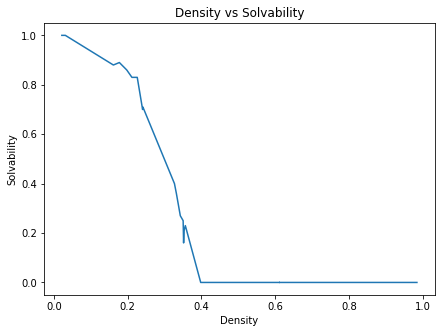

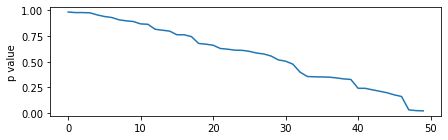

In [61]:
plt.figure(figsize = (7,5))
plt.plot(density, solvability)
plt.xlabel('Density')
plt.ylabel('Solvability')
plt.title("Density vs Solvability")
plt.show()
plt.figure(figsize = (7,2))
plt.plot(p)
plt.ylabel("p value")
plt.show()

## Q5

In [189]:
from queue import PriorityQueue
import operator
import sys
import numpy as np
import random
import math
#without Dictionary update
        

class AStarResolver:
    def __init__(self,Klst,n,m,dlst):
        #self.path=[]
        self.priorityQueue=PriorityQueue()
        self.lst=Klst
        self.n=n
        self.m=m
        self.Klst=Klst
        self.cells_processed=0
        self.exploredset={()}
        
    
    # Function to initialize the Dictionary
    # Key: type(string), x, y coordinates of all the cells
    # Values: type(dictionary), containing the values of g(n), h(n), f(n), p(n)
    def init_dict(self,x = 0,y = 0):
        self.d = {(x,y): [ 0, None, None]}
        return self.d

    def Solve(self,x = 0,y = 0,heuristic = "M"):
        found=0
        self.priorityQueue.put((0,x,y))
        self.init_dict(x,y)
        while not self.priorityQueue.empty():
            
            
            #extracting start 2d list from tuple
            
            
            temp=self.priorityQueue.get()
            #print("PQ top=",temp)
            nTemp=temp[1]
            mTemp=temp[2]
            self.cells_processed=self.cells_processed+1
            #print(self.priorityQueue.empty())
            if nTemp==self.n-1 and mTemp==self.m-1:
                
                found=1
                #print("found")
                break
                
                
            if((nTemp, mTemp) not in self.d):
                return 
            g=self.d[nTemp,mTemp][0]
            g=g+1

            
            if nTemp-1>=0:
                up=(nTemp-1,mTemp)
                if self.lst[int(nTemp)-1][int(mTemp)]!=-1:
                    f1=self.calculateDist(up,g,heuristic)
                    if (nTemp-1,mTemp) not in self.d:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                        #self.exploredset.update([(nTemp-1,mTemp)])
                    elif self.d[nTemp-1,mTemp][0]>g:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                
                        
                
                    
                    
            
            if nTemp+1<self.n:
                down=(nTemp+1,mTemp)
                if self.lst[int(nTemp)+1][int(mTemp)]!=-1:
                    f2=self.calculateDist(down,g,heuristic)
                    if (nTemp+1,mTemp) not in self.d:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
        
                    elif self.d[nTemp+1,mTemp][0]>g:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
            
                        
                
            
            if mTemp+1<self.m:
                east=(nTemp,mTemp+1)
                if self.lst[nTemp][mTemp+1]!=-1:
                    f3=self.calculateDist(east,g,heuristic)
                    if (nTemp,mTemp+1) not in self.d:
                        self.d[nTemp,mTemp+1]= [g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))

                    elif self.d[nTemp,mTemp+1][0]>g:
                        self.d[nTemp,mTemp+1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))
    
                
            if mTemp-1>=0:
                west=(nTemp,mTemp-1)
                if self.lst[nTemp][mTemp-1]!=-1:
                    f4=self.calculateDist(west,g,heuristic)
                    if (nTemp,mTemp-1) not in self.d:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
                        
                    elif self.d[nTemp,mTemp-1][0]>g:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
            
            
            
                
            
        if found==0:
            ##print ("NOSUCCESS")
            filst=[]
            return filst
                
        else:
            
            return self.PathIterator()
            
            
            
            
            
            
        
        
        
    def PathIterator(self):
        filst=[]
        filst.append((self.n-1,self.m-1))
        #print(self.d[self.n-1,self.m-1])
        Pn=self.d[self.n-1,self.m-1][1]
        Pm=self.d[self.n-1,self.m-1][2]
        while Pn is not None or Pm is not None:
            filst.append((Pn,Pm))
            #print("Path Total[{},{}]".format(Pn, Pm),end=" ")
            An=self.d[Pn,Pm][1]
            Am=self.d[Pn,Pm][2]
            Pn,Pm=An,Am
        filst.reverse()
        #print(filst)
        return filst
    
    def EmptyQueue(self):
        while not self.priorityQueue.empty():
            try:
                self.priorityQueue.get(False)
            except Empty:
                continue
            self.priorityQueue.task_done()        
        
            
            
        
        
       
    def calculateDist(self,cord,g,heuristic = "M"):
        h = 0
        if(heuristic == "M"):
            h=abs(self.n-cord[0])+abs(self.m-cord[1])  #Manhattan distance
        elif(heuristic == "E"):
            h=math.sqrt(pow(self.n-cord[0],2)+pow(self.m-cord[1],2)) #euclidean distance
        else:
            h=max(abs(self.n-cord[0]),abs(self.m-cord[1])) # chebyshev
        
        return (g+h,cord[0],cord[1])
    
    
    def get_cells_processed(self):
        return self.cells_processed
    

In [187]:
    def generateRandom(n = 0, p = -1):
        if(n <3):
            # If the user has not provided the size of the matrix
            # We will generate a nxn matrix of size between 3 and 1000
            n = random.randrange(start = 3, stop = 1000)
        # this is the probability of a cell being blocked
        if(p == -1):
            p = np.random.random()
        mat = np.array(random.choices([0,-1], weights = [(1-p), p], k = (n*n)))
        mat.shape = (n, n)
        mat[0,0], mat[n-1, n-1] = 0, 0
        return mat.tolist()

In [190]:
import time

In [161]:
runtimes = []
no_cells_processed = []

runtimes2 = []
no_cells_processed2 = []

runtimes3 = []
no_cells_processed3 = []

#Main
if __name__=="__main__":
    for simulation in range(100):
        rows, cols = (101,101)

        Klst = [[0]*101 for i in range(101)]
        Klst2 = [[0]*101 for i in range(101)]
        Klst3 = [[0]*101 for i in range(101)]
        Flst = generateRandom(101, p=0.1)
        print ("starting")
        
        # Manhattan
        start = time.perf_counter()
        a=AStarResolver(Klst,101,101,Flst)
        trajlst=[]
        bx=0
        by=0
        while(True):
            count=0
            figlst=a.Solve(bx,by)
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break
                
            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst[x-1][y]=Flst[x-1][y]

                if x+1<rows:
                    Klst[x+1][y]=Flst[x+1][y]


                if y+1<cols:
                    Klst[x][y+1]=Flst[x][y+1]

                if y-1>=0:
                    Klst[x][y-1]=Flst[x][y-1]

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                break
        
        stop = time.perf_counter()
        runtimes.append(stop-start)
        no_cells_processed.append(len(trajlst))
        
        
        
        
        
        
        # Euclidean
        start2 = time.perf_counter()
        a=AStarResolver(Klst2,101,101,Flst)
        trajlst=[]
        bx=0
        by=0
        while(True):
            count=0
            figlst=a.Solve(bx,by,"E")
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break
                
            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst2[x-1][y]=Flst[x-1][y]

                if x+1<rows:
                    Klst2[x+1][y]=Flst[x+1][y]


                if y+1<cols:
                    Klst2[x][y+1]=Flst[x][y+1]

                if y-1>=0:
                    Klst2[x][y-1]=Flst[x][y-1]

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                break
        
        stop2 = time.perf_counter()
        runtimes2.append(stop2-start2)
        no_cells_processed2.append(len(trajlst))
        
        
        
        
        
        # Chebyshev
        start3 = time.perf_counter()
        a=AStarResolver(Klst3,101,101,Flst)
        trajlst=[]
        bx=0
        by=0
        while(True):
            count=0
            figlst=a.Solve(bx,by,"C")
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break
                
            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst3[x-1][y]=Flst[x-1][y]

                if x+1<rows:
                    Klst3[x+1][y]=Flst[x+1][y]


                if y+1<cols:
                    Klst3[x][y+1]=Flst[x][y+1]

                if y-1>=0:
                    Klst3[x][y-1]=Flst[x][y-1]

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                break
        
        stop3 = time.perf_counter()
        runtimes3.append(stop3-start3)
        no_cells_processed3.append(len(trajlst))

starting
starting
starting
starting
NOSUCCESS
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
starting
NOSUCCESS
starting
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
starting
NOSUCCESS
starting
starting
starting
NOSUCCESS
starting
NOSUCCESS
starting
starting
starting
starting
NOSUCCESS
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
NOSUCCESS
starting
starting
starting
starting
starting
starting
NOSUCCESS
NOSUCCESS
starting
starting
NOSUCCESS
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
starting
starting
NOSUCCESS
starting
starting
NOSUCCESS
NOSUCCESS
starting
NOSUCCESS
starting
starting
starting
starting
NOSUCCESS
starting
starting
NOSUCCESS
NOSUCCESS
starting
starting
starting
starting
NOSUCCESS
NOSUCCESS
NOSUCCESS
starting
starting
NOSUCCESS
NOSUCCESS
starting
NOSUCCESS
starting
starting
starting
NOSUCCESS
starting
starting
starting
st

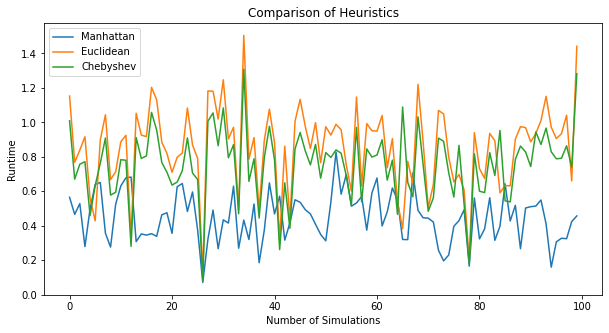

In [181]:
plt.figure(figsize = (10,5))
plt.plot(runtimes, label = "Manhattan")
plt.plot(runtimes2, label = "Euclidean")
plt.plot(runtimes3, label = "Chebyshev")
plt.xlabel("Number of Simulations")
plt.ylabel("Runtime")
plt.title("Comparison of Heuristics")
plt.legend()
plt.show()

In [183]:
avg_runtime_manhattan = sum(runtimes)/100
print("Average Runtime using Manhattan Distance: ", avg_runtime_manhattan)

Average Runtime using Manhattan Distance:  0.4486471929999607


In [184]:
avg_runtime_euclidean = sum(runtimes2)/100
print("Average Runtime using Euclidean Distance: ", avg_runtime_euclidean)

Average Runtime using Euclidean Distance:  0.8514956730000631


In [185]:
avg_runtime_chebyshev = sum(runtimes3)/100
print("Average Runtime using Chebyshev Distance: ", avg_runtime_chebyshev)

Average Runtime using Chebyshev Distance:  0.7534974429999601


## Q6

In [202]:
p_new = [random.uniform(0, 0.2) for i in range(50)]
p_new.sort(reverse = True)
density_new = [0]*50
trajectory = [0]*50
shortest_full = [0]*50
shortest_final = [0]*50
cells_processed = [0]*50
for i in range(50):
    print("p=",p_new[i])
    multiple_density = [0]*100
    multiple_trajectory = [0]*100
    multiple_shortest_full = [0]*100
    multiple_shortest_final = [0]*100
    multiple_cells_processed = [0]*100
    for j in range(100):
        rows, cols = (101,101)
        Klst = [[0]*101 for ix in range(101)]
        Flst = generateRandom(101, p=p_new[i])
        multiple_density[j] = ((101 ** 2) - (pd.Series(Flst).explode().value_counts()[0])) / (101 ** 2)
        print("starting")
        
        a=AStarResolver(Klst,101,101,Flst)
        
        trajlst=[]
        exploredSet=set()
        bx=0
        by=0
        while(True):
            count=0
            figlst=a.Solve(bx,by)
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break
                
            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst[x-1][y]=Flst[x-1][y]
                    exploredSet.update([(x-1,y)])

                if x+1<rows:
                    Klst[x+1][y]=Flst[x+1][y]
                    exploredSet.update([(x+1,y)])


                if y+1<cols:
                    Klst[x][y+1]=Flst[x][y+1]
                    exploredSet.update([(x,y+1)])

                if y-1>=0:
                    Klst[x][y-1]=Flst[x][y-1]
                    exploredSet.update([(x,y-1)])

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                print("SUCCESS")
                break
        
        cp = a.get_cells_processed()
        multiple_cells_processed[j] = cp # total cells popped from the priority queue
        multiple_trajectory[j] = len(trajlst) # trajectory
        temp_mat = [[-1]*101 for i in range(101)]
        for item in exploredSet:
            temp_mat[item[0]][item[1]] = Flst[item[0]][item[1]]
            
        # shortest_final
        final_shortest = AStarResolver(temp_mat,101,101,Flst)
        path_final = final_shortest.Solve()
        multiple_shortest_final[j] = len(path_final) # shortest path in a final gridworld
        
        # shortest_full
        full_shortest = AStarResolver(Flst,101,101,Flst)
        path_full = full_shortest.Solve()
        multiple_shortest_full[j] = len(path_full) # shortest path in a full gridworld
        
    density_new[i] = sum(multiple_density)/100
    trajectory[i] = sum(multiple_trajectory)/100
    shortest_full[i] = sum(multiple_shortest_full)/100
    shortest_final[i] = sum(multiple_shortest_final)/100
    cells_processed[i] = sum(multiple_cells_processed)/100

p= 0.19309518945547693
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUC

SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
startin

NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
p= 0.14261309626780314
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCC

SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS

SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
p= 0.11265046507733274
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUC

SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
S

SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
p= 0.08345295791055303
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUC

SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
p= 0.06241132909147167
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCC

NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
star

starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
p= 0.027069757993889245
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
startin

starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
p= 0.012327995759110656
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
start

In [203]:
trajectory

[109.1,
 108.72,
 138.37,
 145.22,
 160.74,
 147.6,
 167.53,
 174.85,
 166.96,
 169.23,
 154.49,
 177.75,
 168.49,
 187.91,
 184.61,
 190.54,
 188.96,
 183.95,
 184.85,
 187.19,
 192.45,
 192.72,
 206.64,
 197.35,
 199.79,
 201.41,
 204.99,
 210.44,
 204.15,
 202.2,
 210.48,
 210.9,
 211.28,
 209.53,
 206.73,
 211.17,
 212.15,
 208.11,
 208.29,
 208.48,
 205.97,
 205.98,
 207.07,
 205.02,
 204.9,
 202.64,
 203.5,
 203.2,
 203.2,
 201.3]

In [204]:
density_new

[0.1936516027840409,
 0.19297323791785112,
 0.1746201352808548,
 0.1629506911087148,
 0.1537976668954024,
 0.15248308989314774,
 0.14630526418978534,
 0.14453190863640816,
 0.14458092343887854,
 0.14254975002450737,
 0.14277129693167334,
 0.13522105675914126,
 0.13246054308401134,
 0.12485148514851475,
 0.12267326732673267,
 0.1211989020684246,
 0.11469169689246153,
 0.11358788354082927,
 0.11244681893931972,
 0.1119115772963435,
 0.10389471620429369,
 0.1027330653857465,
 0.10203313400646992,
 0.09826389569650036,
 0.0974257425742575,
 0.09518478580531319,
 0.09103911381237136,
 0.08367807077737478,
 0.07954808352122343,
 0.0774120184295657,
 0.07553181060680325,
 0.0736261150867562,
 0.062367414959317725,
 0.06170375453386923,
 0.05778747181648856,
 0.05386040584256447,
 0.05402705617096364,
 0.05024605430840115,
 0.03658464856386629,
 0.03220370551906677,
 0.027062052739927466,
 0.02708557984511322,
 0.025804332908538376,
 0.021818449171649833,
 0.01949318694245662,
 0.0126036663072

In [205]:
shortest_full

[174.87,
 164.86,
 192.98,
 178.89,
 194.99,
 172.86,
 192.96,
 188.94,
 188.94,
 192.96,
 186.95,
 186.93,
 190.95,
 198.99,
 198.99,
 190.95,
 186.93,
 201.0,
 196.98,
 192.96,
 196.98,
 196.98,
 188.94,
 188.94,
 198.99,
 194.97,
 192.96,
 198.99,
 196.98,
 196.98,
 198.99,
 196.98,
 198.99,
 196.98,
 198.99,
 201.0,
 201.0,
 198.99,
 201.0,
 201.0,
 201.0,
 201.0,
 198.99,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0]

In [206]:
shortest_final

[17.74,
 6.61,
 46.31,
 35.1,
 45.75,
 54.13,
 78.44,
 76.03,
 69.2,
 67.39,
 54.03,
 88.85,
 85.21,
 110.13,
 107.64,
 109.99,
 105.35,
 100.25,
 121.41,
 122.13,
 136.76,
 128.08,
 153.96,
 131.5,
 146.03,
 146.35,
 173.18,
 181.1,
 169.47,
 173.99,
 186.01,
 188.74,
 199.26,
 190.46,
 194.42,
 200.25,
 202.52,
 197.76,
 198.53,
 204.0,
 201.35,
 202.88,
 201.29,
 202.84,
 202.3,
 199.71,
 201.76,
 201.66,
 201.64,
 201.04]

In [207]:
cells_processed

[85842.0,
 87546.37,
 83983.23,
 81976.66,
 84215.53,
 80477.99,
 82558.92,
 76754.5,
 74978.5,
 78519.15,
 75233.02,
 73154.18,
 72040.25,
 72015.86,
 71558.04,
 70787.87,
 65481.57,
 67608.9,
 65161.48,
 64617.98,
 62206.45,
 60943.02,
 62625.43,
 58973.16,
 62431.63,
 56811.47,
 57136.75,
 55347.69,
 54528.06,
 48186.6,
 50722.44,
 50463.62,
 37756.81,
 40595.86,
 39189.01,
 37183.46,
 39825.78,
 38426.88,
 29476.48,
 27718.75,
 23669.54,
 24372.62,
 22949.1,
 23166.22,
 18963.08,
 17682.55,
 17277.5,
 17098.05,
 16740.12,
 10672.62]

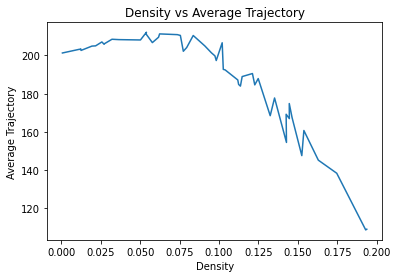



x-axis: Density
y-axis: t = Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)


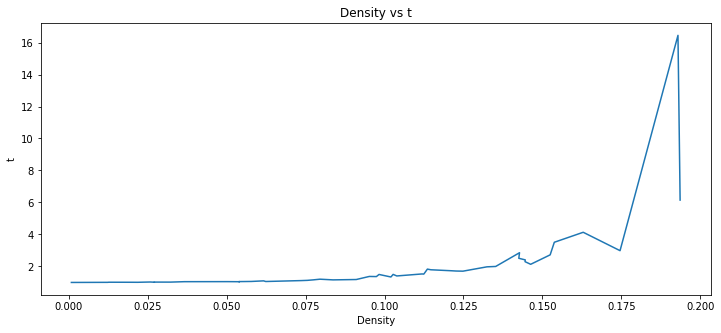



x-axis: Density
y-axis: t = Average (Length of Shortest Path in Final Discovered Gridworld / Length of Shortest Path in Full Gridworld)


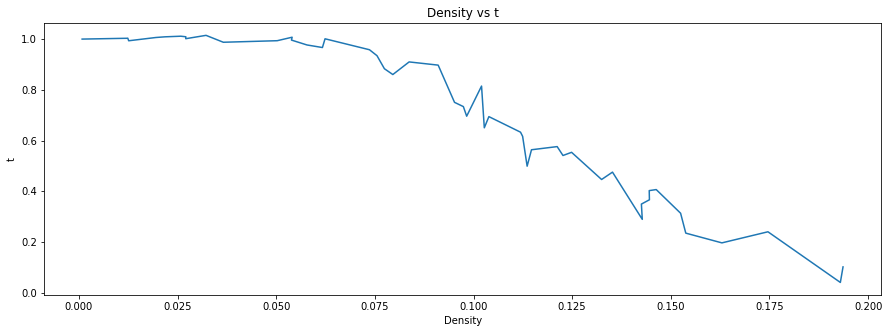



x-axis: Density
y-axis: t = Average Number of Cells Processed by Repeated A*


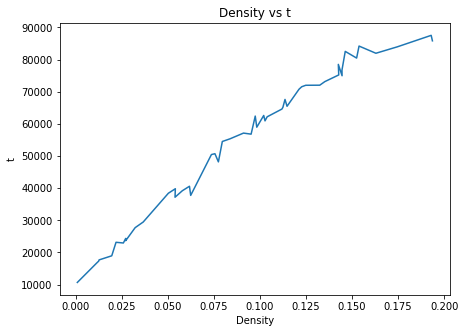

In [220]:
plt.plot(density_new, trajectory)
plt.xlabel('Density')
plt.ylabel('Average Trajectory')
plt.title("Density vs Average Trajectory")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)")
plt.figure(figsize = (12,5))
plt.plot(density_new, (np.array(trajectory)/np.array(shortest_final)))
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average (Length of Shortest Path in Final Discovered Gridworld / Length of Shortest Path in Full Gridworld)")
plt.figure(figsize = (15,5))
plt.plot(density_new, (np.array(shortest_final)/np.array(shortest_full)))
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average Number of Cells Processed by Repeated A*")
plt.figure(figsize = (7,5))
plt.plot(density_new, cells_processed)
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

## Q7

In [13]:
p_new = [random.uniform(0, 0.2) for i in range(50)]
p_new.sort(reverse = True)
density_new = [0]*50
trajectory = [0]*50
shortest_full = [0]*50
shortest_final = [0]*50
cells_processed = [0]*50
for i in range(50):
    print("p=",p_new[i])
    multiple_density = [0]*100
    multiple_trajectory = [0]*100
    multiple_shortest_full = [0]*100
    multiple_shortest_final = [0]*100
    multiple_cells_processed = [0]*100
    for j in range(100):
        rows, cols = (101,101)
        Klst = [[0]*101 for ix in range(101)]
        Flst = generateRandom(101, p=p_new[i])
        multiple_density[j] = ((101 ** 2) - (pd.Series(Flst).explode().value_counts()[0])) / (101 ** 2)
        print("starting")
        
        a=AStarResolver(Klst,101,101,Flst)
        trajlst=[]
        exploredSet=set()
        bx=0
        by=0
        while(True):
            count=0
            figlst=a.Solve(bx,by)
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break
                
            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                #here we are moving in one direction and update knowledge world by bumping to a particular location
                exploredSet.update([(x,y)])

                if Flst[x][y]==-1:
                    Klst[x][y] = -1
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                print("SUCCESS")
                break
        
        cp = a.get_cells_processed()
        multiple_cells_processed[j] = cp # total cells popped from the priority queue
        multiple_trajectory[j] = len(trajlst) # trajectory
        temp_mat = [[-1]*101 for i in range(101)]
        for item in exploredSet:
            temp_mat[item[0]][item[1]] = Flst[item[0]][item[1]]
            
        # shortest_final
        final_shortest = AStarResolver(temp_mat,101,101,Flst)
        path_final = final_shortest.Solve()
        multiple_shortest_final[j] = len(path_final) # shortest path in a final gridworld
        
        # shortest_full
        full_shortest = AStarResolver(Flst,101,101,Flst)
        path_full = full_shortest.Solve()
        multiple_shortest_full[j] = len(path_full) # shortest path in a full gridworld
        
    density_new[i] = sum(multiple_density)/100
    trajectory[i] = sum(multiple_trajectory)/100
    shortest_full[i] = sum(multiple_shortest_full)/100
    shortest_final[i] = sum(multiple_shortest_final)/100
    cells_processed[i] = sum(multiple_cells_processed)/100

p= 0.19674851172020918
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
N

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
st

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
p= 0.16349073156608912
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCES

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
p= 0.1423627131706454
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
sta

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
s

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUC

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
p= 0.09464046786706615
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCES

NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCES

NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
p= 0.06546623161392066
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUC

SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starti

SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
p= 0.04036348651515738
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
sta

starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
NOSUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
p= 0.00621161828982606
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starting
SUCCESS
starti

In [14]:
trajectory

[59.44,
 55.3,
 57.64,
 47.98,
 59.88,
 61.8,
 72.21,
 71.12,
 66.4,
 74.31,
 84.75,
 80.92,
 96.65,
 86.67,
 112.63,
 118.12,
 101.65,
 117.44,
 107.31,
 117.68,
 136.67,
 114.96,
 115.94,
 116.56,
 119.27,
 153.72,
 156.55,
 152.3,
 150.83,
 154.97,
 150.69,
 150.0,
 157.97,
 178.88,
 163.88,
 179.16,
 185.9,
 178.33,
 171.72,
 190.55,
 175.53,
 188.38,
 188.89,
 194.01,
 191.15,
 198.57,
 196.25,
 196.57,
 200.55,
 201.82]

In [15]:
density_new

[0.1966101362611509,
 0.19619449073620232,
 0.19294088814822077,
 0.19148808940299972,
 0.19082638956965003,
 0.1829242231153808,
 0.18265072051759634,
 0.18022154690716596,
 0.16978531516517983,
 0.16377119890206843,
 0.16205960199980388,
 0.15946867954122135,
 0.14343299676502302,
 0.14136751298892267,
 0.14118811881188115,
 0.13364376041564552,
 0.1290059798059014,
 0.12910302911479268,
 0.12736104303499657,
 0.12670816586609157,
 0.12588667777668855,
 0.12075972943829036,
 0.11942064503480056,
 0.11476325850406824,
 0.11455249485344578,
 0.10027938437408095,
 0.0943632977159102,
 0.09362611508675615,
 0.09262523282031167,
 0.09213116361141062,
 0.0873953533967258,
 0.08135967062052737,
 0.07985883736888541,
 0.07869130477404179,
 0.07333398686403295,
 0.06588471718458973,
 0.06388001176355261,
 0.05954416233702577,
 0.05768356043525145,
 0.05121752769336339,
 0.04462601705715123,
 0.04384570140182338,
 0.042340946965983735,
 0.0418135476914028,
 0.040261739045191654,
 0.03800411724

In [16]:
shortest_full

[176.9,
 166.85,
 172.88,
 160.86,
 160.82,
 172.86,
 176.9,
 162.81,
 176.96,
 180.9,
 190.95,
 182.91,
 188.96,
 190.95,
 190.95,
 186.93,
 192.96,
 186.93,
 188.94,
 192.96,
 188.94,
 186.93,
 188.94,
 194.97,
 190.95,
 199.03,
 194.97,
 201.0,
 190.95,
 188.94,
 196.98,
 198.99,
 198.99,
 198.99,
 201.0,
 198.99,
 196.98,
 198.99,
 198.99,
 201.0,
 198.99,
 198.99,
 194.97,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0,
 201.0]

In [17]:
shortest_final

[2.37,
 0.0,
 2.25,
 2.29,
 0.0,
 0.0,
 2.25,
 0.0,
 4.58,
 0.0,
 2.31,
 8.84,
 9.12,
 11.27,
 24.39,
 28.85,
 11.01,
 35.42,
 24.17,
 26.78,
 44.3,
 28.67,
 26.24,
 35.06,
 21.7,
 71.77,
 86.56,
 71.17,
 66.97,
 73.54,
 66.67,
 79.71,
 87.77,
 115.44,
 93.92,
 131.9,
 131.3,
 138.01,
 124.29,
 153.61,
 137.76,
 152.29,
 164.53,
 162.54,
 177.33,
 180.97,
 189.9,
 181.46,
 197.63,
 198.2]

In [18]:
cells_processed

[82776.26,
 79137.17,
 82251.29,
 70753.42,
 83199.49,
 82474.15,
 83522.58,
 74097.4,
 76262.89,
 71932.79,
 82134.53,
 82046.2,
 74580.39,
 69828.4,
 78396.28,
 76701.68,
 66490.46,
 80785.28,
 68999.82,
 76692.95,
 73840.51,
 71616.05,
 65693.27,
 64565.9,
 66955.53,
 61673.32,
 57826.94,
 61539.56,
 59150.53,
 56956.73,
 55032.32,
 53996.98,
 52837.75,
 54796.68,
 48961.01,
 45933.53,
 43992.46,
 42192.96,
 40933.81,
 39321.81,
 34925.23,
 31783.8,
 33915.25,
 32501.44,
 33126.31,
 29265.89,
 25954.75,
 25079.68,
 18662.87,
 13026.29]

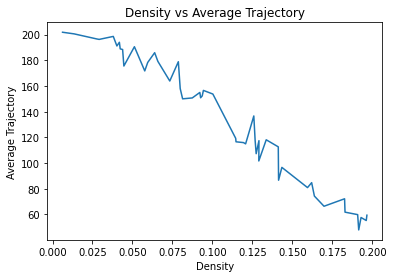



x-axis: Density
y-axis: t = Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)


<ipython-input-20-942422920c96>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(density_new, (np.array(trajectory)/np.array(shortest_final)))


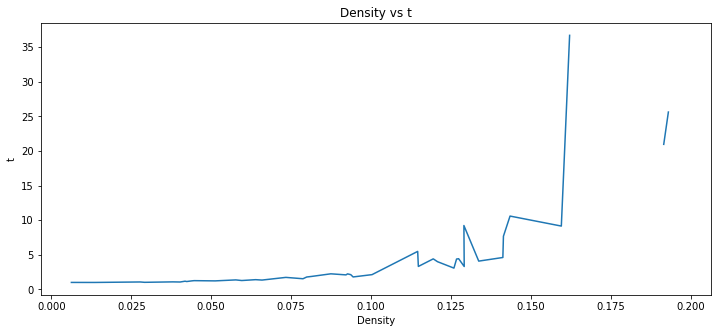



x-axis: Density
y-axis: t = Average (Length of Shortest Path in Final Discovered Gridworld / Length of Shortest Path in Full Gridworld)


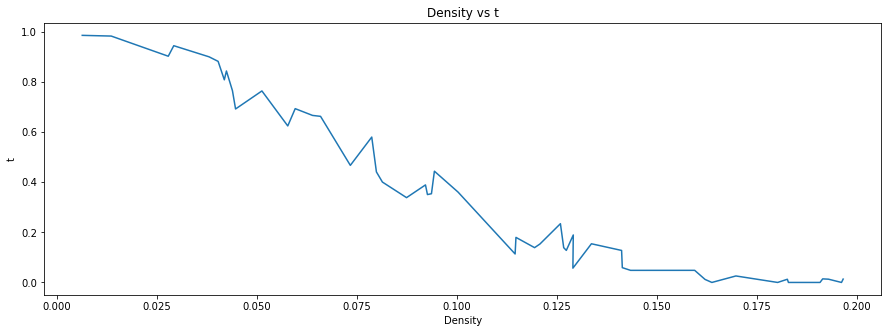



x-axis: Density
y-axis: t = Average Number of Cells Processed by Repeated A*


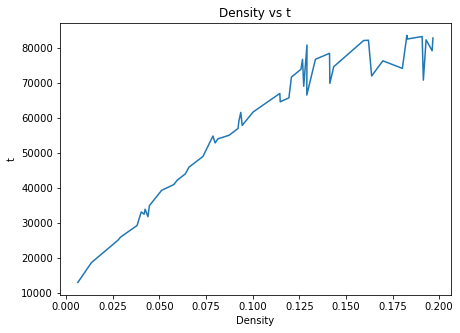

In [20]:
import matplotlib.pyplot as plt
plt.plot(density_new, trajectory)
plt.xlabel('Density')
plt.ylabel('Average Trajectory')
plt.title("Density vs Average Trajectory")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)")
plt.figure(figsize = (12,5))
plt.plot(density_new, (np.array(trajectory)/np.array(shortest_final)))
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average (Length of Shortest Path in Final Discovered Gridworld / Length of Shortest Path in Full Gridworld)")
plt.figure(figsize = (15,5))
plt.plot(density_new, (np.array(shortest_final)/np.array(shortest_full)))
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

print()
print()
print("x-axis: Density")
print("y-axis: t = Average Number of Cells Processed by Repeated A*")
plt.figure(figsize = (7,5))
plt.plot(density_new, cells_processed)
plt.xlabel('Density')
plt.ylabel('t')
plt.title("Density vs t")
plt.show()

## Q9 Double Heuristic

In [221]:
from queue import PriorityQueue
import operator
import sys
import numpy as np
import random
#without Dictionary update
        

class AStarResolver:
    def __init__(self,Klst,n,m,dlst):
        #self.path=[]
        self.priorityQueue=PriorityQueue()
        self.lst=Klst
        self.n=n
        self.m=m
        self.Klst=Klst
        self.count=0
        self.exploredset={()}
        
    
    # Function to initialize the Dictionary
    # Key: type(string), x, y coordinates of all the cells
    # Values: type(dictionary), containing the values of g(n), h(n), f(n), p(n)
    def init_dict(self,x = 0,y = 0):
        self.d = {(x,y): [ 0, None, None]}
        return self.d

    def Solve(self,x = 0,y = 0):
        found=0
        self.priorityQueue.put((0,x,y))
        self.init_dict(x,y)
        while not self.priorityQueue.empty():
            
            
            #extracting start 2d list from tuple
            
            
            temp=self.priorityQueue.get()
            #print("PQ top=",temp)
            nTemp=temp[1]
            mTemp=temp[2]
            self.count=self.count+1
            #print(self.priorityQueue.empty())
            if nTemp==self.n-1 and mTemp==self.m-1:
                
                found=1
                #print("found")
                break
                
                
            if((nTemp, mTemp) not in self.d):
                return 
            g=self.d[nTemp,mTemp][0]
            g=g+1

            
            if nTemp-1>=0:
                up=(nTemp-1,mTemp)
                if self.lst[int(nTemp)-1][int(mTemp)]!=-1:
                    f1=self.calculateDist(up,g)
                    if (nTemp-1,mTemp) not in self.d:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                        #self.exploredset.update([(nTemp-1,mTemp)])
                    elif self.d[nTemp-1,mTemp][0]>g:
                        self.d[nTemp-1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f1[0],f1[1],f1[2]))
                
                        
                
                    
                    
            
            if nTemp+1<self.n:
                down=(nTemp+1,mTemp)
                if self.lst[int(nTemp)+1][int(mTemp)]!=-1:
                    f2=self.calculateDist(down,g)
                    if (nTemp+1,mTemp) not in self.d:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
        
                    elif self.d[nTemp+1,mTemp][0]>g:
                        self.d[nTemp+1,mTemp]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f2[0],f2[1],f2[2]))
            
                        
                
            
            if mTemp+1<self.m:
                east=(nTemp,mTemp+1)
                if self.lst[nTemp][mTemp+1]!=-1:
                    f3=self.calculateDist(east,g)
                    if (nTemp,mTemp+1) not in self.d:
                        self.d[nTemp,mTemp+1]= [g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))

                    elif self.d[nTemp,mTemp+1][0]>g:
                        self.d[nTemp,mTemp+1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f3[0],f3[1],f3[2]))
    
                
            if mTemp-1>=0:
                west=(nTemp,mTemp-1)
                if self.lst[nTemp][mTemp-1]!=-1:
                    f4=self.calculateDist(west,g)
                    if (nTemp,mTemp-1) not in self.d:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
                        
                    elif self.d[nTemp,mTemp-1][0]>g:
                        self.d[nTemp,mTemp-1]=[g,nTemp,mTemp]
                        self.priorityQueue.put((f4[0],f4[1],f4[2]))
            
            
            
                
            
        if found==0:
            ##print ("NOSUCCESS")
            filst=[]
            return filst
                
        else:
            
            return self.PathIterator()
            
            
            
            
            
            
        
        
        
    def PathIterator(self):
        filst=[]
        filst.append((self.n-1,self.m-1))
        #print(self.d[self.n-1,self.m-1])
        Pn=self.d[self.n-1,self.m-1][1]
        Pm=self.d[self.n-1,self.m-1][2]
        while Pn is not None or Pm is not None:
            filst.append((Pn,Pm))
            #print("Path Total[{},{}]".format(Pn, Pm),end=" ")
            An=self.d[Pn,Pm][1]
            Am=self.d[Pn,Pm][2]
            Pn,Pm=An,Am
        filst.reverse()
        #print(filst)
        return filst
    
    def EmptyQueue(self):
        while not self.priorityQueue.empty():
            try:
                self.priorityQueue.get(False)
            except Empty:
                continue
            self.priorityQueue.task_done()        
        
            
            
        
        
       
    def calculateDist(self,cord,g):
        
        h=(abs(self.n-cord[0])+abs(self.m-cord[1])) #Manhattan distance - Old Heuristic
        #h=(abs(self.n-cord[0])+abs(self.m-cord[1]))*2 #New Manhattan distance - New Heuristic
        h=(abs(self.n-cord[0])+abs(self.m-cord[1]))
        #h=max(abs(self.n-cord[0]),abs(self.m-cord[1])) # chebyshev
        return (g+h,cord[0],cord[1])
    
    

In [222]:
    def generateRandom(n = 0, p = -1):
        if(n <3):
            # If the user has not provided the size of the matrix
            # We will generate a nxn matrix of size between 3 and 1000
            n = random.randrange(start = 3, stop = 1000)
        # this is the probability of a cell being blocked
        if(p == -1):
            p = np.random.random()
        mat = np.array(random.choices([0,-1], weights = [(1-p), p], k = (n*n)))
        mat.shape = (n, n)
        mat[0,0], mat[n-1, n-1] = 0, 0
        return mat.tolist()

In [223]:
import time

In [232]:
#Main
runtimes = [0]*50
if __name__=="__main__":

    for i in range(50):
        rows, cols = (101,101)

        Klst = [[0]*101 for i in range(101)]

        Flst = generateRandom(101,p=0.1)
        print ("starting")
        start = time.perf_counter()
        a=AStarResolver(Klst,101,101,Flst)

        exploredSet=set()
        trajlst=[]
        bx=0
        by=0

        while(True):
            count=0
            figlst=a.Solve(bx,by)
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break

            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst[x-1][y]=Flst[x-1][y]
                    exploredSet.update([(x-1,y)])
                    #exploredset

                if x+1<rows:
                    Klst[x+1][y]=Flst[x+1][y]
                    exploredSet.update([(x+1,y)])


                if y+1<cols:
                    Klst[x][y+1]=Flst[x][y+1]
                    exploredSet.update([(x,y+1)])

                if y-1>=0:
                    Klst[x][y-1]=Flst[x][y-1]
                    exploredSet.update([(x,y-1)])

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                break

        stop = time.perf_counter()
        print("##################################################################################################")
        print("##################################################################################################")
        #print("know",Klst)
        print("explored set length", len(exploredSet))
        print("explored set", exploredSet)
        print("trajectory length", len(trajlst))
        print("trajectory", trajlst)
        #print("Flst=",Flst)
        #print("know",Klst)
        print("fig",figlst)
        print("##################################################################################################")
        print("##################################################################################################")
        print("Runtime = ", stop-start)
        runtimes[i] = stop-start

starting
NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 366
explored set {(35, 97), (0, 5), (0, 14), (0, 23), (9, 99), (2, 50), (39, 99), (2, 59), (2, 68), (4, 87), (12, 100), (23, 100), (4, 96), (1, 72), (0, 0), (0, 9), (19, 98), (2, 27), (30, 98), (2, 54), (20, 99), (4, 82), (31, 99), (4, 91), (1, 67), (4, 100), (1, 76), (2, 13), (2, 22), (4, 77), (1, 53), (4, 86), (12, 99), (1, 62), (23, 99), (4, 95), (1, 71), (15, 100), (26, 100), (2, 17), (2, 26), (1, 48), (4, 81), (1, 57), (4, 90), (1, 66), (4, 99), (34, 100), (1, 75), (7, 100), (18, 100), (2, 12), (2, 21), (1, 34), (1, 43), (4, 76), (1, 52), (4, 85), (1, 61), (1, 70), (3, 98), (37, 100), (15, 99), (26, 99), (0, 56), (0, 65), (2, 16), (1, 29), (33, 98), (1, 38), (1, 47), (4, 80), (1, 56), (1, 65), (3, 84), (34, 99), (3, 93), (0, 51), (7, 99), (18, 99),

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 531
explored set {(13, 88), (35, 97), (88, 100), (9, 63), (0, 5), (9, 72), (17, 85), (6, 48), (77, 99), (17, 94), (6, 57), (50, 100), (61, 100), (3, 15), (39, 99), (3, 24), (23, 100), (51, 100), (13, 83), (16, 88), (46, 98), (0, 0), (6, 34), (9, 67), (6, 43), (6, 52), (6, 61), (58, 99), (69, 99), (80, 99), (19, 98), (42, 100), (81, 100), (3, 10), (12, 77), (3, 19), (12, 86), (20, 99), (3, 28), (31, 99), (87, 98), (13, 78), (13, 87), (35, 96), (88, 99), (6, 29), (9, 62), (38, 98), (6, 38), (9, 71), (6, 47), (77, 98), (6, 56), (50, 99), (61, 99), (91, 100), (19, 93), (3, 14), (39, 98), (12, 81), (3, 23), (23, 99), (53, 100), (64, 100), (13, 82), (5, 41), (16, 87), (6, 33), (9, 66), (26, 100), (6, 42), (18, 96), (6, 51), (8, 70), (2, 8), (19, 88), (19, 97), (42, 99

explored set length 291
explored set {(1, 31), (6, 82), (1, 40), (6, 91), (2, 39), (4, 73), (1, 49), (0, 51), (2, 48), (7, 99), (1, 58), (0, 60), (2, 57), (0, 5), (3, 77), (2, 66), (0, 14), (5, 83), (2, 75), (0, 23), (5, 92), (1, 15), (9, 99), (1, 24), (1, 33), (6, 84), (2, 32), (4, 66), (10, 100), (1, 42), (0, 44), (2, 41), (7, 92), (1, 51), (0, 53), (2, 50), (3, 70), (0, 62), (2, 59), (0, 7), (3, 79), (2, 68), (0, 16), (5, 85), (4, 87), (5, 94), (1, 8), (1, 17), (1, 26), (1, 35), (0, 37), (2, 34), (1, 44), (0, 46), (2, 43), (7, 94), (0, 55), (2, 52), (0, 0), (3, 72), (0, 64), (2, 61), (0, 9), (5, 78), (6, 98), (5, 87), (4, 89), (5, 96), (1, 10), (1, 19), (1, 28), (0, 30), (1, 37), (0, 39), (2, 36), (1, 46), (0, 48), (2, 45), (3, 65), (0, 57), (2, 54), (0, 2), (3, 74), (0, 66), (5, 80), (4, 82), (6, 100), (5, 89), (1, 3), (4, 91), (1, 67), (1, 12), (1, 21), (1, 30), (0, 32), (8, 100), (1, 39), (0, 41), (2, 38), (0, 50), (2, 47), (3, 67), (0, 59), (2, 56), (4, 75), (3, 76), (6, 93), (5

##################################################################################################
##################################################################################################
explored set length 521
explored set {(13, 88), (13, 97), (7, 26), (88, 100), (99, 100), (7, 35), (9, 63), (0, 5), (0, 14), (77, 99), (50, 100), (61, 100), (10, 45), (10, 54), (10, 63), (39, 99), (3, 24), (12, 91), (12, 100), (23, 100), (51, 100), (96, 99), (13, 92), (7, 30), (9, 49), (9, 58), (0, 0), (6, 34), (0, 9), (58, 99), (69, 99), (80, 99), (42, 100), (10, 40), (10, 49), (81, 100), (10, 58), (12, 77), (3, 19), (12, 86), (20, 99), (31, 99), (12, 95), (88, 99), (9, 44), (99, 99), (9, 53), (6, 29), (9, 62), (38, 98), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (10, 44), (12, 72), (39, 98), (12, 81), (3, 23), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (9, 39), (9, 48), (6, 24), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (2, 8), (2, 17), (11, 84), (42, 99), (8

##################################################################################################
##################################################################################################
explored set length 527
explored set {(13, 97), (88, 100), (99, 100), (5, 65), (0, 5), (5, 83), (0, 14), (77, 99), (5, 92), (9, 99), (50, 100), (61, 100), (2, 50), (39, 99), (2, 59), (3, 24), (2, 68), (3, 33), (4, 87), (12, 100), (23, 100), (4, 96), (51, 100), (96, 99), (0, 0), (6, 34), (0, 9), (6, 43), (5, 87), (5, 96), (58, 99), (69, 99), (80, 99), (8, 98), (42, 100), (81, 100), (2, 54), (3, 19), (20, 99), (3, 28), (4, 82), (31, 99), (4, 91), (5, 46), (88, 99), (99, 99), (5, 64), (6, 38), (5, 82), (2, 13), (27, 97), (50, 99), (61, 99), (91, 100), (2, 22), (2, 49), (4, 68), (3, 23), (4, 77), (4, 86), (12, 99), (23, 99), (53, 100), (4, 95), (64, 100), (5, 41), (6, 33), (15, 100), (26, 100), (6, 42), (7, 96), (2, 17), (42, 99), (83, 100), (94, 100), (4, 63), (3, 18), (4, 72), (4, 81), (72, 99

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 383
explored set {(1, 86), (1, 95), (0, 5), (0, 14), (0, 23), (9, 99), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (3, 24), (2, 68), (3, 33), (12, 100), (23, 100), (3, 42), (1, 81), (1, 90), (1, 99), (0, 0), (0, 9), (2, 27), (0, 94), (2, 36), (2, 45), (2, 54), (20, 99), (3, 28), (31, 99), (3, 37), (4, 100), (1, 85), (1, 94), (38, 98), (2, 13), (2, 22), (0, 89), (2, 31), (0, 98), (2, 40), (2, 49), (4, 68), (39, 98), (3, 23), (4, 77), (12, 99), (23, 99), (1, 80), (1, 89), (15, 100), (26, 100), (2, 17), (0, 84), (2, 26), (0, 93), (2, 35), (4, 63), (4, 72), (1, 48), (4, 99), (34, 100), (1, 84), (7, 100), (18, 100), (2, 12), (0, 79), (2, 21), (0, 88), (2, 30), (4, 49), (0, 97), (4, 58), (1, 34), (4, 67), (1, 43), (4, 76), (3, 98), (37, 100), (15, 99), (26, 99), (2,

##################################################################################################
##################################################################################################
explored set length 514
explored set {(88, 100), (99, 100), (0, 5), (0, 14), (77, 99), (0, 23), (6, 57), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (2, 50), (39, 99), (12, 100), (23, 100), (51, 100), (96, 99), (46, 98), (0, 0), (0, 9), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (19, 98), (42, 100), (81, 100), (2, 45), (20, 99), (31, 99), (87, 98), (88, 99), (99, 99), (5, 55), (77, 98), (6, 56), (6, 65), (8, 84), (50, 99), (61, 99), (91, 100), (8, 93), (2, 31), (11, 98), (2, 49), (12, 99), (23, 99), (53, 100), (64, 100), (5, 59), (68, 97), (15, 100), (26, 100), (7, 96), (8, 70), (69, 98), (8, 79), (80, 98), (8, 88), (8, 97), (19, 97), (42, 99), (83, 100), (94, 100), (1, 48), (72, 99), (87, 97), (34, 100), (45, 100), (56, 100), (88, 98), (5, 54), 

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 512
explored set {(88, 100), (0, 5), (5, 83), (0, 14), (77, 99), (5, 92), (0, 23), (9, 99), (50, 100), (61, 100), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (2, 68), (4, 87), (12, 100), (23, 100), (4, 96), (1, 72), (51, 100), (46, 98), (57, 98), (0, 0), (0, 9), (5, 87), (5, 96), (58, 99), (69, 99), (80, 99), (42, 100), (2, 27), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (4, 82), (31, 99), (4, 91), (1, 67), (4, 100), (88, 99), (38, 98), (5, 82), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (2, 31), (11, 98), (2, 40), (2, 49), (39, 98), (4, 77), (1, 53), (4, 86), (12, 99), (1, 62), (23, 99), (4, 95), (53, 100), (64, 100), (1, 71), (46, 97), (15, 100), (26, 100), (58, 98), (2, 17), (42, 99), (2, 26), (83, 100), (94, 100), (2, 35), (1, 48), (4, 81), (72,

##################################################################################################
##################################################################################################
explored set length 552
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (0, 14), (77, 99), (5, 92), (0, 23), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (2, 50), (39, 99), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (5, 78), (0, 9), (5, 87), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (20, 99), (31, 99), (87, 98), (3, 37), (88, 99), (99, 99), (5, 55), (5, 64), (38, 98), (49, 98), (5, 73), (5, 82), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (11, 98), (2, 40), (2, 49), (4, 68), (39, 98), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 50), (5, 59), (5, 68), (15, 100), (26, 100), (5, 77), (7, 96), (80, 98), (2, 8), (2, 17),

##################################################################################################
##################################################################################################
explored set length 546
explored set {(88, 100), (99, 100), (7, 35), (0, 5), (9, 72), (9, 81), (77, 99), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (2, 32), (10, 45), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (9, 49), (9, 58), (0, 0), (6, 34), (9, 67), (0, 9), (6, 43), (9, 76), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (8, 98), (2, 27), (19, 98), (42, 100), (10, 49), (81, 100), (3, 10), (3, 19), (20, 99), (3, 28), (31, 99), (65, 97), (9, 44), (88, 99), (99, 99), (9, 53), (9, 62), (38, 98), (6, 38), (9, 71), (9, 80), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (3, 14), (39, 98), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (9, 48), (9, 57), (6, 33), (15, 100), (26, 100), (6, 42), (8, 70),

##################################################################################################
##################################################################################################
explored set length 538
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (9, 63), (0, 5), (9, 72), (0, 14), (6, 48), (77, 99), (0, 23), (6, 57), (50, 100), (61, 100), (2, 32), (2, 41), (39, 99), (3, 24), (12, 91), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (13, 92), (57, 98), (9, 58), (0, 0), (9, 67), (0, 9), (9, 76), (6, 52), (58, 99), (69, 99), (80, 99), (42, 100), (2, 27), (2, 36), (81, 100), (2, 45), (12, 77), (12, 86), (20, 99), (3, 28), (31, 99), (12, 95), (3, 37), (88, 99), (99, 99), (5, 55), (9, 62), (49, 98), (9, 71), (77, 98), (6, 56), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (2, 40), (12, 81), (3, 23), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 50), (5, 59), (9, 57), (9, 66), (15, 100), (26, 100), (6, 51), 

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 349
explored set {(13, 88), (16, 93), (9, 63), (0, 5), (0, 14), (6, 48), (6, 57), (2, 32), (3, 24), (3, 33), (23, 100), (13, 83), (16, 88), (16, 97), (5, 60), (9, 58), (0, 0), (6, 34), (9, 67), (0, 9), (6, 43), (6, 52), (6, 61), (2, 27), (12, 77), (20, 99), (3, 28), (13, 78), (13, 87), (5, 46), (16, 92), (5, 55), (9, 62), (6, 38), (6, 47), (6, 56), (2, 13), (2, 22), (2, 31), (12, 72), (12, 81), (3, 23), (23, 99), (13, 82), (5, 41), (16, 87), (5, 50), (5, 59), (15, 91), (6, 33), (9, 66), (15, 100), (6, 42), (6, 51), (2, 17), (2, 26), (12, 67), (12, 76), (5, 36), (5, 45), (5, 54), (15, 86), (9, 61), (15, 95), (6, 37), (6, 46), (8, 65), (18, 100), (11, 70), (11, 79), (2, 21), (2, 30), (4, 49), (12, 71), (12, 80), (5, 31), (14, 98), (5, 40), (5, 49), (5, 58), (15, 9

##################################################################################################
##################################################################################################
explored set length 522
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (9, 63), (0, 5), (9, 72), (0, 14), (6, 48), (77, 99), (0, 23), (92, 97), (50, 100), (61, 100), (2, 32), (2, 41), (2, 50), (10, 63), (39, 99), (54, 97), (12, 91), (23, 100), (51, 100), (13, 83), (96, 99), (13, 92), (9, 49), (9, 58), (0, 0), (9, 67), (0, 9), (9, 76), (6, 52), (58, 99), (69, 99), (80, 99), (19, 98), (42, 100), (2, 36), (81, 100), (2, 45), (10, 58), (12, 77), (12, 86), (20, 99), (31, 99), (13, 87), (88, 99), (99, 99), (9, 53), (9, 62), (38, 98), (49, 98), (9, 71), (50, 99), (61, 99), (91, 100), (2, 31), (2, 40), (2, 49), (12, 81), (12, 90), (23, 99), (53, 100), (64, 100), (13, 82), (5, 50), (9, 57), (15, 91), (9, 66), (15, 100), (26, 100), (6, 51), (2, 8), (11, 84), (42, 99), (83, 100), (94, 100), (2

##################################################################################################
##################################################################################################
explored set length 516
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (0, 14), (77, 99), (0, 23), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (39, 99), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (5, 78), (0, 9), (5, 87), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (20, 99), (3, 28), (4, 82), (31, 99), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (5, 73), (5, 82), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (4, 68), (4, 77), (4, 86), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 50), (5, 59), (5, 68), (15, 100), (26, 100), (5, 77), (7, 96), (69, 98), (80, 98), (8, 88), (2, 17), (8, 97), (2, 26), (4

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 384
explored set {(13, 88), (13, 97), (9, 63), (0, 5), (0, 14), (6, 48), (10, 63), (39, 99), (3, 24), (12, 91), (12, 100), (23, 100), (13, 74), (13, 83), (13, 92), (9, 58), (0, 0), (6, 34), (9, 67), (0, 9), (6, 43), (6, 52), (42, 100), (10, 58), (12, 77), (3, 19), (12, 86), (20, 99), (3, 28), (31, 99), (12, 95), (13, 78), (13, 87), (5, 46), (6, 29), (9, 62), (38, 98), (6, 38), (6, 47), (6, 56), (2, 22), (11, 89), (12, 72), (39, 98), (12, 81), (3, 23), (12, 90), (12, 99), (23, 99), (13, 73), (13, 82), (5, 41), (5, 50), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (6, 42), (6, 51), (2, 17), (11, 84), (42, 99), (12, 76), (3, 18), (12, 85), (12, 94), (34, 100), (5, 27), (5, 36), (5, 45), (6, 28), (9, 61), (6, 37), (6, 46), (8, 65), (18, 100), (11, 70), (11, 79),

##################################################################################################
##################################################################################################
explored set length 509
explored set {(13, 97), (88, 100), (99, 100), (0, 5), (0, 14), (6, 48), (9, 81), (77, 99), (0, 23), (6, 57), (9, 90), (6, 66), (50, 100), (61, 100), (6, 75), (2, 32), (39, 99), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (57, 98), (0, 0), (0, 9), (6, 43), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (42, 100), (2, 27), (2, 36), (81, 100), (20, 99), (3, 28), (31, 99), (12, 95), (87, 98), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (6, 38), (6, 47), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (11, 98), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (58, 98), (8, 79), (80, 98), (2, 17), (42, 99), (2, 2

##################################################################################################
##################################################################################################
explored set length 521
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (9, 81), (77, 99), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (2, 32), (2, 41), (2, 50), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (0, 9), (9, 76), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (3, 10), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (88, 99), (99, 99), (5, 55), (5, 64), (5, 73), (9, 80), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (2, 49), (3, 14), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 59), (5, 68), (15, 100), (26, 100), (80, 98), (8, 79), (2, 8), (8, 88), (2, 

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 368
explored set {(13, 97), (5, 65), (5, 74), (0, 5), (6, 48), (6, 66), (9, 99), (6, 75), (6, 84), (3, 6), (3, 15), (3, 24), (3, 33), (12, 100), (23, 100), (16, 97), (5, 60), (5, 69), (0, 0), (5, 78), (6, 43), (6, 61), (6, 70), (8, 98), (3, 10), (3, 19), (20, 99), (3, 28), (5, 46), (5, 55), (5, 64), (5, 73), (6, 38), (5, 82), (6, 47), (6, 65), (8, 84), (2, 13), (8, 93), (11, 98), (3, 5), (3, 14), (4, 68), (3, 23), (12, 99), (23, 99), (5, 41), (5, 50), (5, 59), (5, 68), (15, 100), (5, 77), (6, 42), (7, 96), (2, 8), (8, 88), (2, 17), (8, 97), (3, 9), (4, 63), (3, 18), (5, 27), (5, 36), (5, 45), (5, 54), (5, 63), (6, 37), (7, 91), (6, 46), (7, 100), (18, 100), (2, 3), (8, 83), (2, 12), (8, 92), (2, 21), (4, 49), (3, 4), (4, 58), (4, 67), (5, 22), (5, 31), (14, 98),

##################################################################################################
##################################################################################################
explored set length 533
explored set {(88, 100), (99, 100), (5, 65), (0, 5), (9, 72), (0, 14), (6, 48), (9, 81), (77, 99), (0, 23), (6, 57), (9, 90), (6, 66), (50, 100), (61, 100), (2, 32), (39, 99), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (0, 0), (0, 9), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (19, 98), (2, 27), (42, 100), (2, 36), (81, 100), (12, 77), (20, 99), (31, 99), (12, 95), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (9, 71), (9, 80), (6, 56), (6, 65), (8, 84), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (11, 98), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (5, 59), (15, 100), (26, 100), (6, 51), (8, 70), (69, 98), (8, 79), (8, 88), (2, 17), (42, 99), (2, 26), (83, 100), (11, 93), (94

##################################################################################################
##################################################################################################
explored set length 543
explored set {(13, 97), (88, 100), (99, 100), (9, 63), (0, 5), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (3, 15), (39, 99), (3, 24), (12, 100), (23, 100), (51, 100), (96, 99), (57, 98), (9, 58), (0, 0), (6, 34), (0, 9), (6, 43), (9, 76), (6, 52), (9, 85), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (30, 98), (42, 100), (81, 100), (10, 58), (3, 19), (20, 99), (3, 28), (31, 99), (5, 46), (88, 99), (99, 99), (5, 55), (9, 62), (38, 98), (6, 38), (6, 47), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (11, 98), (3, 14), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (57, 97), (9, 57), (6, 33), (15, 100), (26, 100), (6, 42), (6, 51

##################################################################################################
##################################################################################################
explored set length 544
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (7, 35), (9, 63), (0, 5), (6, 48), (77, 99), (50, 100), (61, 100), (3, 6), (3, 15), (10, 63), (39, 99), (3, 24), (12, 91), (23, 100), (13, 74), (51, 100), (13, 83), (96, 99), (13, 92), (7, 30), (16, 97), (9, 58), (0, 0), (6, 34), (6, 43), (6, 52), (58, 99), (69, 99), (80, 99), (19, 98), (42, 100), (81, 100), (3, 10), (12, 77), (3, 19), (12, 86), (20, 99), (3, 28), (31, 99), (13, 69), (13, 78), (13, 87), (65, 97), (88, 99), (99, 99), (9, 53), (6, 29), (9, 62), (6, 47), (2, 13), (50, 99), (61, 99), (91, 100), (12, 63), (12, 72), (3, 14), (12, 81), (3, 23), (95, 97), (12, 90), (23, 99), (53, 100), (64, 100), (13, 73), (13, 82), (96, 98), (9, 39), (9, 57), (15, 91), (6, 33), (15, 100), (26, 100), (6, 42), (6, 51), (5

##################################################################################################
##################################################################################################
explored set length 519
explored set {(13, 88), (13, 97), (7, 26), (88, 100), (99, 100), (7, 35), (9, 63), (0, 5), (9, 72), (0, 14), (9, 81), (77, 99), (50, 100), (61, 100), (10, 63), (39, 99), (12, 91), (12, 100), (23, 100), (51, 100), (96, 99), (13, 92), (7, 21), (7, 30), (9, 49), (9, 58), (0, 0), (6, 34), (9, 67), (0, 9), (9, 76), (58, 99), (69, 99), (80, 99), (42, 100), (81, 100), (3, 19), (12, 86), (20, 99), (31, 99), (12, 95), (13, 87), (88, 99), (9, 44), (99, 99), (9, 53), (6, 29), (9, 62), (9, 71), (9, 80), (2, 13), (50, 99), (61, 99), (91, 100), (11, 89), (12, 81), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (9, 39), (9, 48), (6, 24), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (8, 79), (2, 8), (2, 17), (11, 84), (42, 99), (83, 100), (94, 100), (11, 93), (3, 1

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 449
explored set {(9, 63), (9, 72), (6, 48), (9, 81), (9, 90), (9, 99), (50, 100), (61, 100), (3, 6), (10, 54), (3, 15), (10, 63), (39, 99), (3, 24), (12, 100), (23, 100), (51, 100), (9, 49), (9, 58), (0, 0), (6, 34), (9, 67), (6, 43), (9, 76), (9, 85), (58, 99), (19, 98), (42, 100), (3, 1), (3, 10), (10, 58), (3, 19), (20, 99), (3, 28), (31, 99), (5, 46), (9, 53), (9, 62), (6, 38), (9, 71), (6, 47), (9, 80), (50, 99), (61, 99), (11, 89), (11, 98), (3, 5), (3, 14), (3, 23), (12, 99), (23, 99), (53, 100), (5, 41), (5, 50), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (2, 8), (11, 84), (42, 99), (11, 93), (3, 0), (3, 9), (3, 18), (34, 100), (5, 27), (45, 100), (56, 100), (5, 36), (5, 45), (9, 52), (9, 61), (6, 37), (6, 46), (8, 65), 

##################################################################################################
##################################################################################################
explored set length 531
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (9, 81), (77, 99), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (2, 32), (3, 6), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (9, 85), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (3, 10), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (49, 98), (5, 73), (9, 80), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (11, 98), (3, 5), (3, 14), (4, 68), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (5, 59), (5, 68), (15, 100), (26, 100), (7, 96), (69, 98), (8, 79), (2, 8), (8,

##################################################################################################
##################################################################################################
explored set length 517
explored set {(13, 97), (88, 100), (99, 100), (0, 5), (9, 72), (0, 14), (6, 48), (77, 99), (0, 23), (6, 57), (92, 97), (6, 66), (50, 100), (61, 100), (2, 32), (39, 99), (12, 91), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (13, 92), (5, 60), (0, 0), (9, 67), (0, 9), (6, 43), (6, 52), (6, 61), (58, 99), (69, 99), (80, 99), (42, 100), (2, 27), (2, 36), (81, 100), (12, 77), (12, 86), (20, 99), (3, 28), (31, 99), (12, 95), (3, 37), (5, 46), (65, 97), (88, 99), (99, 99), (5, 55), (5, 64), (9, 71), (6, 47), (6, 56), (6, 65), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (11, 98), (12, 81), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (68, 97), (9, 66), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (80, 98), (11, 84),

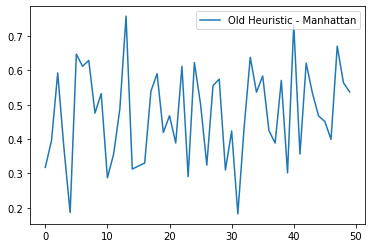

In [233]:
import matplotlib.pyplot as plt
plt.plot(runtimes, label = "Old Heuristic - Manhattan")
plt.legend()
plt.show()

In [235]:
print("Average Runtime with Old Heuristic = ", sum(runtimes)/50)

Average Runtime with Old Heuristic =  0.47252253600003313


In [236]:
#Main
runtimes2 = [0]*50
if __name__=="__main__":

    for i in range(50):
        rows, cols = (101,101)

        Klst = [[0]*101 for i in range(101)]

        Flst = generateRandom(101,p=0.1)
        print ("starting")
        start = time.perf_counter()
        a=AStarResolver(Klst,101,101,Flst)

        exploredSet=set()
        trajlst=[]
        bx=0
        by=0

        while(True):
            count=0
            figlst=a.Solve(bx,by)
            if((figlst==None) or (len(figlst) == 0)):
                print("NOSUCCESS")
                break

            figlst_len = len(figlst)
            for item in range(len(figlst)):
                count=count+1
                x=figlst[item][0]
                y=figlst[item][1]

                if x-1>=0:
                    Klst[x-1][y]=Flst[x-1][y]
                    exploredSet.update([(x-1,y)])
                    #exploredset

                if x+1<rows:
                    Klst[x+1][y]=Flst[x+1][y]
                    exploredSet.update([(x+1,y)])


                if y+1<cols:
                    Klst[x][y+1]=Flst[x][y+1]
                    exploredSet.update([(x,y+1)])

                if y-1>=0:
                    Klst[x][y-1]=Flst[x][y-1]
                    exploredSet.update([(x,y-1)])

                if Flst[x][y]==-1:
                    bx=figlst[item-1][0]
                    by=figlst[item-1][1]
                    break
                else:
                    if((len(trajlst) == 0) or (trajlst[-1]!=(x,y))):
                        trajlst.append((x,y))

            if count==figlst_len:
                break

        stop = time.perf_counter()
        print("##################################################################################################")
        print("##################################################################################################")
        #print("know",Klst)
        print("explored set length", len(exploredSet))
        print("explored set", exploredSet)
        print("trajectory length", len(trajlst))
        print("trajectory", trajlst)
        #print("Flst=",Flst)
        #print("know",Klst)
        print("fig",figlst)
        print("##################################################################################################")
        print("##################################################################################################")
        print("Runtime = ", stop-start)
        runtimes2[i] = stop-start

starting
##################################################################################################
##################################################################################################
explored set length 529
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (7, 35), (9, 63), (77, 99), (50, 100), (61, 100), (4, 2), (10, 36), (10, 45), (3, 6), (10, 54), (10, 63), (39, 99), (12, 91), (23, 100), (13, 74), (51, 100), (13, 83), (96, 99), (13, 92), (7, 30), (9, 49), (9, 58), (0, 0), (6, 34), (9, 67), (58, 99), (69, 99), (80, 99), (42, 100), (10, 40), (3, 1), (10, 49), (81, 100), (10, 58), (12, 77), (12, 86), (20, 99), (31, 99), (13, 69), (13, 78), (13, 87), (88, 99), (9, 44), (99, 99), (9, 53), (6, 29), (9, 62), (49, 98), (50, 99), (61, 99), (91, 100), (10, 35), (11, 89), (10, 44), (3, 5), (12, 72), (12, 81), (12, 90), (23, 99), (53, 100), (64, 100), (13, 73), (13, 82), (9, 39), (6, 15), (9, 48), (6, 24), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (80, 98), 

##################################################################################################
##################################################################################################
explored set length 516
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (0, 14), (77, 99), (0, 23), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (5, 78), (0, 9), (5, 87), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (31, 99), (88, 99), (99, 99), (5, 64), (38, 98), (49, 98), (5, 73), (5, 82), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (2, 49), (4, 68), (39, 98), (1, 53), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 59), (5, 68), (15, 100), (26, 100), (5, 77), (7, 96), (2, 8), (2, 17), (8, 97), (2, 26), (42, 99), (83, 100), (94, 100), (2, 35

##################################################################################################
##################################################################################################
explored set length 524
explored set {(7, 26), (88, 100), (99, 100), (7, 35), (9, 63), (0, 5), (9, 72), (9, 81), (77, 99), (50, 100), (61, 100), (10, 45), (10, 54), (3, 15), (10, 63), (39, 99), (3, 24), (12, 91), (12, 100), (23, 100), (51, 100), (96, 99), (7, 30), (9, 49), (57, 98), (9, 58), (0, 0), (6, 34), (9, 67), (0, 9), (9, 76), (9, 85), (58, 99), (69, 99), (80, 99), (42, 100), (10, 49), (81, 100), (3, 10), (10, 58), (3, 19), (12, 86), (20, 99), (31, 99), (12, 95), (88, 99), (9, 44), (99, 99), (9, 53), (6, 29), (9, 62), (38, 98), (6, 38), (9, 71), (9, 80), (2, 13), (50, 99), (61, 99), (91, 100), (11, 89), (10, 44), (11, 98), (3, 14), (3, 23), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (9, 39), (9, 48), (68, 97), (9, 57), (6, 33), (9, 66), (15, 100), (26, 100), (58, 98), (69, 98

##################################################################################################
##################################################################################################
explored set length 563
explored set {(7, 17), (7, 26), (88, 100), (16, 93), (99, 100), (7, 35), (0, 5), (8, 18), (77, 99), (50, 100), (61, 100), (10, 36), (10, 45), (3, 6), (39, 99), (23, 100), (13, 65), (13, 74), (51, 100), (13, 83), (96, 99), (7, 21), (16, 88), (7, 30), (9, 49), (16, 97), (0, 0), (58, 99), (69, 99), (80, 99), (19, 98), (30, 98), (42, 100), (10, 40), (10, 49), (81, 100), (3, 10), (12, 77), (13, 51), (20, 99), (31, 99), (13, 60), (13, 69), (13, 78), (13, 87), (65, 97), (9, 44), (16, 92), (76, 97), (88, 99), (99, 99), (38, 98), (77, 98), (50, 99), (61, 99), (91, 100), (10, 35), (10, 44), (12, 63), (3, 5), (12, 72), (39, 98), (13, 55), (23, 99), (13, 64), (53, 100), (64, 100), (13, 73), (13, 82), (9, 30), (9, 39), (16, 87), (6, 15), (9, 48), (15, 91), (15, 100), (26, 100), (6

##################################################################################################
##################################################################################################
explored set length 517
explored set {(88, 100), (99, 100), (0, 5), (5, 83), (0, 14), (77, 99), (5, 92), (0, 23), (9, 99), (50, 100), (61, 100), (6, 84), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (54, 97), (2, 68), (3, 33), (4, 87), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (0, 0), (0, 9), (5, 87), (5, 96), (58, 99), (69, 99), (80, 99), (19, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (4, 82), (31, 99), (3, 37), (88, 99), (99, 99), (5, 82), (50, 99), (61, 99), (91, 100), (2, 31), (11, 98), (2, 40), (2, 49), (4, 68), (39, 98), (4, 77), (1, 53), (4, 86), (12, 99), (1, 62), (23, 99), (53, 100), (64, 100), (15, 100), (26, 100), (7, 96), (69, 98), (42, 99), (2, 26), (83, 100), (94, 100), (2, 35), (4, 63), (4, 72), (1, 48), (4, 81), (72, 99), (1, 57), (4,

##################################################################################################
##################################################################################################
explored set length 532
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (0, 5), (0, 14), (6, 48), (9, 81), (77, 99), (0, 23), (6, 57), (6, 66), (50, 100), (61, 100), (6, 75), (2, 32), (39, 99), (12, 91), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (13, 92), (5, 60), (0, 0), (6, 34), (0, 9), (6, 43), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (19, 98), (2, 27), (42, 100), (81, 100), (20, 99), (31, 99), (12, 95), (5, 46), (88, 99), (99, 99), (5, 55), (6, 38), (6, 47), (9, 80), (77, 98), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (11, 98), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (5, 59), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (69, 98), (8, 79), (2, 8), (2,

##################################################################################################
##################################################################################################
explored set length 520
explored set {(88, 100), (99, 100), (0, 5), (0, 14), (77, 99), (6, 57), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (46, 98), (57, 98), (0, 0), (0, 9), (6, 52), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (3, 19), (20, 99), (3, 28), (31, 99), (87, 98), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (3, 14), (39, 98), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (15, 100), (26, 100), (7, 96), (6, 51), (8, 70), (58, 98), (8, 79), (8, 88), (2, 17), (8, 97), (2, 26), 

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 238
explored set {(4, 55), (7, 72), (4, 64), (2, 39), (5, 65), (0, 5), (3, 22), (9, 72), (8, 73), (0, 14), (3, 31), (4, 30), (3, 40), (4, 39), (1, 15), (3, 49), (4, 48), (6, 66), (1, 24), (6, 75), (4, 57), (7, 74), (2, 32), (4, 66), (2, 41), (5, 67), (0, 7), (3, 24), (9, 74), (8, 75), (0, 16), (3, 33), (4, 32), (1, 8), (3, 42), (4, 41), (1, 17), (6, 68), (4, 50), (7, 67), (1, 26), (6, 77), (2, 25), (4, 59), (7, 76), (2, 34), (5, 60), (5, 69), (0, 0), (8, 68), (0, 9), (3, 26), (9, 76), (3, 35), (4, 34), (1, 10), (3, 44), (4, 43), (1, 19), (6, 70), (4, 52), (7, 69), (1, 28), (2, 27), (4, 61), (7, 78), (2, 36), (5, 53), (3, 65), (5, 62), (0, 2), (9, 69), (3, 28), (4, 27), (1, 3), (3, 37), (4, 36), (1, 12), (4, 45), (1, 21), (2, 20), (4, 54), (7, 71), (2, 29), (5, 4

##################################################################################################
##################################################################################################
explored set length 528
explored set {(24, 97), (88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (0, 14), (6, 48), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (46, 98), (57, 98), (5, 69), (0, 0), (5, 78), (0, 9), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (2, 36), (81, 100), (3, 19), (20, 99), (3, 28), (31, 99), (87, 98), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (5, 73), (5, 82), (6, 47), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (11, 98), (3, 23), (84, 97), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (5, 68), (15

##################################################################################################
##################################################################################################
explored set length 519
explored set {(88, 100), (99, 100), (5, 65), (0, 5), (0, 14), (77, 99), (0, 23), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 41), (2, 50), (39, 99), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (57, 98), (5, 69), (0, 0), (0, 9), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (19, 98), (42, 100), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (31, 99), (3, 37), (88, 99), (99, 99), (5, 55), (5, 64), (38, 98), (5, 73), (6, 56), (6, 65), (8, 84), (27, 97), (50, 99), (61, 99), (8, 93), (91, 100), (2, 40), (2, 49), (39, 98), (12, 99), (23, 99), (53, 100), (64, 100), (5, 59), (5, 68), (15, 100), (26, 100), (7, 96), (80, 98), (8, 79), (8, 88), (8, 97), (42, 99), (83, 100), (94, 100), (2, 35), (4, 63), (1, 48), (72

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 375
explored set {(7, 26), (7, 35), (9, 63), (0, 5), (9, 72), (0, 14), (9, 81), (9, 90), (9, 99), (10, 63), (12, 100), (23, 100), (7, 21), (7, 30), (9, 49), (9, 58), (0, 0), (9, 67), (0, 9), (9, 76), (9, 85), (3, 19), (20, 99), (31, 99), (9, 44), (9, 53), (6, 29), (9, 62), (9, 71), (9, 80), (2, 22), (11, 89), (11, 98), (12, 99), (23, 99), (9, 39), (9, 48), (6, 24), (9, 57), (9, 66), (15, 100), (26, 100), (8, 70), (2, 17), (11, 84), (11, 93), (3, 18), (34, 100), (9, 34), (9, 43), (6, 19), (9, 52), (6, 28), (9, 61), (18, 100), (8, 65), (11, 70), (11, 79), (2, 21), (11, 88), (11, 97), (5, 22), (9, 38), (9, 47), (6, 23), (6, 32), (8, 51), (15, 99), (26, 99), (8, 60), (8, 69), (11, 74), (2, 16), (11, 83), (11, 92), (33, 98), (34, 99), (5, 26), (9, 33), (6, 18), (8, 4

##################################################################################################
##################################################################################################
explored set length 523
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (77, 99), (6, 57), (92, 97), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (2, 32), (2, 41), (2, 50), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (5, 78), (0, 9), (6, 52), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (30, 98), (42, 100), (2, 36), (81, 100), (2, 45), (3, 19), (20, 99), (3, 28), (4, 82), (31, 99), (87, 98), (3, 37), (65, 97), (88, 99), (99, 99), (5, 55), (5, 64), (5, 73), (5, 82), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (2, 49), (3, 14), (4, 68), (3, 23), (4, 77), (12, 99), (23, 99), (53, 100), (64, 100), (5, 50), (5, 5

##################################################################################################
##################################################################################################
explored set length 533
explored set {(88, 100), (99, 100), (0, 5), (0, 14), (77, 99), (5, 92), (0, 23), (9, 99), (50, 100), (61, 100), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (2, 68), (4, 87), (12, 100), (23, 100), (4, 96), (1, 72), (51, 100), (96, 99), (0, 0), (0, 9), (5, 87), (5, 96), (58, 99), (69, 99), (80, 99), (8, 98), (2, 27), (19, 98), (42, 100), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (4, 82), (31, 99), (4, 91), (1, 67), (4, 100), (88, 99), (99, 99), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (2, 31), (11, 98), (2, 40), (2, 49), (4, 77), (1, 53), (4, 86), (12, 99), (1, 62), (23, 99), (4, 95), (53, 100), (64, 100), (1, 71), (15, 100), (26, 100), (2, 8), (2, 17), (8, 97), (2, 26), (42, 99), (83, 100), (94, 100), (2, 35), (4, 72), (1, 48), (4, 81), (72, 99), (1, 57

##################################################################################################
##################################################################################################
explored set length 545
explored set {(88, 100), (99, 100), (5, 65), (9, 72), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (2, 32), (2, 41), (3, 6), (3, 15), (39, 99), (54, 97), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (46, 98), (57, 98), (5, 69), (0, 0), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (30, 98), (42, 100), (2, 36), (3, 1), (81, 100), (3, 10), (3, 19), (20, 99), (3, 28), (31, 99), (87, 98), (3, 37), (5, 46), (65, 97), (88, 99), (99, 99), (5, 55), (5, 64), (9, 71), (9, 80), (6, 56), (6, 65), (8, 84), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (2, 40), (3, 5), (3, 14), (4, 68), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 50), (5, 

##################################################################################################
##################################################################################################
explored set length 543
explored set {(88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (6, 48), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (3, 6), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (5, 78), (6, 43), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (81, 100), (3, 10), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (5, 46), (76, 97), (88, 99), (99, 99), (5, 55), (5, 64), (38, 98), (5, 73), (6, 38), (5, 82), (6, 47), (77, 98), (6, 56), (6, 65), (8, 84), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (11, 98), (3, 5), (3, 14), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (5, 68), (15, 100), (26,

##################################################################################################
##################################################################################################
explored set length 546
explored set {(88, 100), (99, 100), (5, 74), (0, 5), (5, 83), (0, 14), (77, 99), (5, 92), (0, 23), (9, 99), (50, 100), (61, 100), (6, 84), (2, 32), (2, 41), (2, 50), (39, 99), (2, 59), (20, 95), (2, 68), (3, 33), (4, 87), (12, 100), (23, 100), (3, 42), (4, 96), (51, 100), (96, 99), (46, 98), (5, 69), (0, 0), (5, 78), (0, 9), (5, 87), (5, 96), (58, 99), (69, 99), (80, 99), (19, 98), (2, 27), (30, 98), (42, 100), (2, 36), (81, 100), (2, 45), (2, 54), (20, 99), (4, 82), (31, 99), (87, 98), (3, 37), (4, 91), (1, 67), (4, 100), (88, 99), (99, 99), (38, 98), (5, 73), (5, 82), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (2, 31), (2, 40), (2, 49), (4, 68), (39, 98), (4, 77), (1, 53), (4, 86), (12, 99), (1, 62), (23, 99), (4, 95), (53, 100), (64, 100), (15, 100), (26, 100

##################################################################################################
##################################################################################################
explored set length 553
explored set {(88, 100), (99, 100), (0, 5), (9, 72), (6, 48), (9, 81), (77, 99), (6, 57), (92, 97), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (0, 0), (0, 9), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (30, 98), (42, 100), (81, 100), (3, 10), (3, 19), (20, 99), (31, 99), (87, 98), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (6, 29), (38, 98), (9, 71), (6, 47), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (11, 89), (11, 98), (3, 14), (39, 98), (3, 23), (84, 97), (95, 97), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (6, 24), (15, 100), (26, 100), (6, 51), (8, 70), (80, 98), (8, 79), (2, 8), (2, 

##################################################################################################
##################################################################################################
explored set length 542
explored set {(88, 100), (99, 100), (5, 65), (0, 5), (0, 14), (6, 48), (9, 81), (77, 99), (0, 23), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (2, 32), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (16, 97), (5, 60), (5, 69), (0, 0), (0, 9), (6, 43), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (19, 98), (42, 100), (81, 100), (20, 99), (3, 28), (31, 99), (3, 37), (5, 46), (65, 97), (88, 99), (99, 99), (5, 55), (5, 64), (38, 98), (49, 98), (5, 73), (6, 38), (6, 47), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (2, 31), (39, 98), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (5, 68), (15, 100), (

##################################################################################################
##################################################################################################
explored set length 538
explored set {(88, 100), (99, 100), (5, 65), (0, 5), (0, 14), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (2, 32), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (46, 98), (57, 98), (0, 0), (0, 9), (6, 43), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (8, 98), (2, 27), (42, 100), (81, 100), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (6, 47), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (27, 97), (50, 99), (61, 99), (8, 93), (2, 22), (91, 100), (2, 31), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (5, 41), (5, 50), (5, 59), (57, 97), (15, 100), (26, 100), (6, 42), (7, 96), (6, 51), (8, 70), 

##################################################################################################
##################################################################################################
explored set length 548
explored set {(13, 97), (88, 100), (99, 100), (5, 65), (0, 5), (9, 72), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (50, 100), (61, 100), (3, 6), (39, 99), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (46, 98), (57, 98), (5, 69), (0, 0), (6, 34), (6, 43), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (42, 100), (81, 100), (20, 99), (31, 99), (12, 95), (5, 46), (65, 97), (88, 99), (99, 99), (5, 55), (5, 64), (6, 29), (38, 98), (6, 38), (9, 71), (6, 47), (9, 80), (77, 98), (6, 56), (6, 65), (50, 99), (61, 99), (91, 100), (11, 89), (11, 98), (3, 5), (39, 98), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (6, 15), (5, 59), (6, 24), (5, 68), (6, 33), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (58, 98), (8, 

##################################################################################################
##################################################################################################
explored set length 539
explored set {(88, 100), (99, 100), (0, 5), (9, 72), (0, 14), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (3, 15), (39, 99), (3, 24), (12, 100), (23, 100), (51, 100), (96, 99), (0, 0), (6, 34), (9, 67), (0, 9), (6, 43), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (19, 98), (42, 100), (81, 100), (3, 19), (20, 99), (31, 99), (88, 99), (99, 99), (6, 29), (49, 98), (6, 38), (9, 71), (6, 47), (9, 80), (77, 98), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (8, 93), (2, 22), (11, 98), (3, 14), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (6, 33), (15, 100), (26, 100), (6, 42), (6, 51), (8, 70), (69, 98), (8, 79), (80, 98), (8, 88), (2, 17), (19, 97), (42, 99), (83, 100), (11,

##################################################################################################
##################################################################################################
explored set length 537
explored set {(13, 97), (88, 100), (99, 100), (0, 5), (9, 72), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (50, 100), (61, 100), (2, 32), (2, 41), (2, 50), (3, 15), (39, 99), (3, 24), (12, 91), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (13, 92), (0, 0), (0, 9), (9, 76), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (19, 98), (2, 27), (42, 100), (2, 36), (81, 100), (2, 45), (3, 10), (2, 54), (3, 19), (20, 99), (3, 28), (31, 99), (12, 95), (87, 98), (3, 37), (65, 97), (76, 97), (88, 99), (5, 55), (99, 99), (9, 71), (9, 80), (77, 98), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (2, 31), (11, 98), (2, 40), (2, 49), (3, 14), (3, 23), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (96, 98), (15, 100), (26

##################################################################################################
##################################################################################################
explored set length 521
explored set {(13, 88), (13, 97), (88, 100), (99, 100), (7, 35), (9, 63), (0, 5), (6, 48), (77, 99), (50, 100), (61, 100), (3, 6), (10, 54), (3, 15), (10, 63), (39, 99), (12, 91), (12, 100), (23, 100), (13, 74), (51, 100), (13, 83), (96, 99), (13, 92), (7, 30), (9, 49), (57, 98), (9, 58), (0, 0), (6, 34), (6, 43), (58, 99), (69, 99), (80, 99), (42, 100), (81, 100), (3, 10), (10, 58), (12, 77), (3, 19), (12, 86), (20, 99), (31, 99), (12, 95), (13, 78), (13, 87), (5, 46), (88, 99), (99, 99), (9, 53), (6, 29), (9, 62), (6, 38), (6, 47), (2, 13), (50, 99), (61, 99), (91, 100), (11, 89), (11, 98), (12, 63), (3, 5), (12, 72), (3, 14), (12, 81), (12, 90), (12, 99), (23, 99), (53, 100), (64, 100), (13, 73), (13, 82), (96, 98), (5, 41), (57, 97), (6, 24), (9, 57), (6, 33), (15

##################################################################################################
##################################################################################################
explored set length 532
explored set {(88, 100), (99, 100), (5, 65), (0, 5), (9, 72), (0, 14), (6, 48), (9, 81), (77, 99), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (96, 99), (5, 60), (57, 98), (0, 0), (0, 9), (9, 76), (6, 52), (9, 85), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (42, 100), (2, 27), (81, 100), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (5, 46), (76, 97), (88, 99), (99, 99), (5, 55), (5, 64), (9, 71), (6, 47), (9, 80), (77, 98), (6, 56), (6, 65), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (11, 89), (11, 98), (3, 23), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (57, 97), (15, 100), (26, 100), (6, 51), (8, 70), (58, 98), (8, 79), (2, 8), (2, 17), (11, 84)

##################################################################################################
##################################################################################################
explored set length 539
explored set {(35, 97), (88, 100), (99, 100), (5, 65), (5, 74), (0, 5), (5, 83), (6, 48), (77, 99), (5, 92), (6, 57), (6, 66), (9, 99), (50, 100), (61, 100), (6, 75), (6, 84), (3, 15), (39, 99), (3, 24), (12, 100), (23, 100), (51, 100), (96, 99), (5, 60), (5, 69), (0, 0), (6, 34), (5, 78), (0, 9), (6, 43), (6, 52), (5, 96), (6, 61), (58, 99), (69, 99), (80, 99), (6, 70), (42, 100), (81, 100), (3, 10), (3, 19), (20, 99), (31, 99), (87, 98), (5, 46), (88, 99), (99, 99), (5, 55), (5, 64), (6, 29), (38, 98), (5, 73), (6, 38), (5, 82), (6, 47), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (91, 100), (2, 22), (3, 14), (39, 98), (3, 23), (4, 77), (12, 99), (23, 99), (53, 100), (64, 100), (5, 41), (5, 50), (5, 59), (5, 68), (6, 33), (15, 100), (26, 100), (5, 77), (

NOSUCCESS
##################################################################################################
##################################################################################################
explored set length 448
explored set {(5, 65), (0, 5), (9, 72), (9, 81), (6, 57), (9, 90), (6, 66), (9, 99), (50, 100), (61, 100), (2, 32), (2, 41), (2, 50), (3, 15), (39, 99), (3, 24), (3, 33), (12, 100), (23, 100), (3, 42), (51, 100), (5, 60), (5, 69), (0, 0), (0, 9), (9, 76), (9, 85), (6, 61), (58, 99), (6, 70), (42, 100), (2, 27), (2, 36), (2, 45), (3, 10), (2, 54), (3, 19), (20, 99), (3, 28), (31, 99), (3, 37), (65, 97), (5, 55), (5, 64), (9, 71), (9, 80), (6, 56), (6, 65), (8, 84), (2, 13), (50, 99), (61, 99), (2, 22), (11, 89), (2, 31), (11, 98), (2, 40), (2, 49), (3, 14), (3, 23), (1, 53), (12, 99), (23, 99), (53, 100), (64, 100), (5, 59), (5, 68), (15, 100), (26, 100), (8, 70), (58, 98), (8, 79), (2, 8), (8, 88), (2, 17), (42, 99), (2, 26), (11, 93), (2, 35), (3, 9), (3, 1

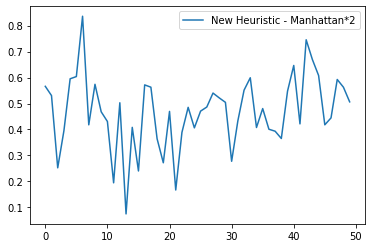

In [237]:
import matplotlib.pyplot as plt
plt.plot(runtimes2, label = "New Heuristic - Manhattan*2")
plt.legend()
plt.show()

In [238]:
print("Average Runtime with New Heuristic = ", sum(runtimes2)/100)

Average Runtime with New Heuristic =  0.23375711300024704
